# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом  разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

Шаги, необходимые для решения поставленных задач:

* [1. Загрузка и первичное ознакомление с предоставленными данными](#0) 
* [1. Задача 1](#1)
* [1.1. Загрузка данных](#2)
* [1.2. Предобработка данных](#2)
* [1.3. Исследовательский анализ данных](#2)
* [1.4. Подготовка данных](#2)
* [1.5. Обучение моделей](#2)
* [1.6. Обучение моделей](#2)
* [1.7. Выводы](#3)
* [2. Общий вывод](#3)

In [1]:
!pip install -U scikit-learn -q  

In [2]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy==1.21.2

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.2 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0rc1, 1.23.0rc2, 1.23.0rc3, 1.2

In [4]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install shap 

In [6]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib

print(f"Matplotlib version: {matplotlib.__version__}")

Matplotlib version: 3.7.1


In [9]:
import numpy as np

In [10]:
print(np.__version__)

1.24.3


In [11]:
import numpy as np
print(np.__version__)

1.24.3


In [12]:
# Базовые библиотеки
import pandas as pd # Датафреймы
import numpy as np # Математика для массивов
from math import factorial # Факториалы
from scipy import stats as st # Статистика
import os # Библиотека для оптимизации чтения данных из файла
import time # Расчет времени выполнения функций
import warnings
import copy
from scipy.stats import norm, probplot
warnings.filterwarnings("ignore")
import missingno as msno


# Pipeline (пайплайн)
from sklearn.pipeline import(
    Pipeline, # Pipeline с ручным вводом названий шагов.
    make_pipeline # Pipeline с автоматическим названием шагов.
)
# Функция для поддержки экспериментальной функции HavingGridSearchSV
from sklearn.experimental import enable_halving_search_cv
# Ускоренная автоматизация поиска лучших моделей и их параметров
from sklearn.model_selection import HalvingGridSearchCV
# Ускоренная автоматизация рандомного поиска лучших моделей и их параметров
from sklearn.model_selection import HalvingRandomSearchCV

# Автоматизация раздельного декодирования признаков
from sklearn.compose import(
    make_column_selector, 
    make_column_transformer, 
    ColumnTransformer
)
from sklearn.impute import SimpleImputer
# Обработка данных для машинного обучения
# Стандартизация данных
import re

from sklearn.preprocessing import(
    OneHotEncoder, # Создание отдельных столбцов для каждого категориального значения, drop='first' (удаление первого столбца против dummy-ловушки), sparse=False (?)
    OrdinalEncoder, # Кодирование порядковых категориальных признаков
    #TargetEncoder, # Кодирование категорий на основе таргетов (ошибка, модуль не найден)  
    StandardScaler, 
    MinMaxScaler,
    RobustScaler
)

# Другие функции предобработки данных # Заполнение пропусков в данных методом k-блжиайших соседей.
from sklearn.utils import shuffle # Перемешивание данных для уравновешивания их в разных выборках

from sklearn.model_selection import(
    RandomizedSearchCV,
    GridSearchCV, # Поиск гиперпараметров по сетке (GridSearch)
    train_test_split, # Разделение выборок с целевыми и нецелевыми признаками на обучающую и тестовую
    validation_curve, 
    StratifiedKFold, # Кроссвалидация с указанием количества фолдов (частей, на которые будет разбита обучающая выборка, одна из которых будет участвовать в валидации)
    KFold, # Кроссвалидация 
    cross_val_score # Оценка качества модели на кроссвалидации
)

# Различные модели машинного обучения (в данном проекте требуется регрессия)
# (есть разбор на https://russianblogs.com/article/83691573909/)
# Линейная модель
from sklearn.linear_model import(
    ElasticNet, Lasso,#LogisticRegression, # Линейная классификация
    LinearRegression, # Линейная регрессия
    
)

# Случайный лес
from sklearn.ensemble import(
    #RandomForestClassifier, # Случайный лес. Классификация
    RandomForestRegressor,  GradientBoostingRegressor # Случайный лес. Регрессия
)
from sklearn.tree import DecisionTreeRegressor 

# CatBoost (made in Yandex)
from catboost import(
    CatBoostRegressor # CatBoost (Яндекс). Регрессия
)
# LightGBM
from lightgbm import(
    LGBMRegressor # LightGBM. Регрессия
)
#import xgboost as xgb
#xgb.set_config(verbosity=0)
from sklearn.base import BaseEstimator, TransformerMixin

# Метрики (Показатели качества моделей)
from sklearn.metrics import(
    # Метрики для моделей регрессии
    mean_absolute_error, # MAE, Средняя абсолютная ошибка (не чувствительная к выбросам)
    mean_absolute_percentage_error, # MAPE, Средняя абсолютная ошибка в % (универсальная в %)
    mean_squared_error, # MSE, Средняя квадратичная ошибка (дисперсия, чувствительная к выбросам), RMSE (сигма) = mean_squared_error(test_y, preds, squared=False)
    r2_score, # R^2, Коэффициент детерминации (универсальная в %, чувствительная к выбросам, может быть отрицательной и возвращать NaN)
    
    # Другое
    make_scorer # Функция для использования собственных функций в параметре scoring функции HalvingGridSearchC
)

# Визуализация графиков
import seaborn as sns
#import matplotlib
%matplotlib inline
#from matplotlib import pyplot as plt
from matplotlib import rcParams, rcParamsDefault
from pandas.plotting import scatter_matrix

from windrose import WindroseAxes
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import phik 
from phik.report import plot_correlation_matrix

C:\Users\Elena\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [13]:
def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
        '''
        Function optimizes memory usage in dataframe
        df: pd.DataFrame - data table
        print_size: bool - display of optimization results
        return pd.DataFrame - amount of optimized memory
        '''
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Типы, которые будем проверять на оптимизацию
        # Размер занимаемой памяти до оптимизации (в Мб)
        before_size = df.memory_usage().sum() / 1024**2    
        for column in df.columns:
            column_type = df[column].dtypes
            if column_type in numerics:
                column_min = df[column].min()
                column_max = df[column].max()
                if str(column_type).startswith('int'):
                    if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                        df[column] = df[column].astype(np.int8)
                    elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                        df[column] = df[column].astype(np.int16)
                    elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                        df[column] = df[column].astype(np.int32)
                    elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                        df[column] = df[column].astype(np.int64)  
                else:
                    if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                        df[column] = df[column].astype(np.float32)
                    else:
                        df[column] = df[column].astype(np.float64)    
        # Размер занимаемой памяти после оптимизации (в Мб)
        after_size = df.memory_usage().sum() / 1024**2
        if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                            .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
        return df
    


def set_frame_style_2(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.highlight_null().set_caption(caption).set_table_styles([{
        'selector': 'caption',
        'props': [
            ('color', 'Blue'),
            ('font-size', '18px'),
            ('font-weight','bold')
        ]}])

def check_data_2(data, title):
    cols = data.columns.to_list()
    display(set_frame_style_2(data[cols].head(), f'{title}: Первые 5 строк датафрейма'))
    display(set_frame_style_2(data[cols].describe(), f'{title}: Статистики'))
    display(set_frame_style_2(data[cols].nunique().to_frame().rename({0:'Уникальные значения'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column'))
    display(set_frame_style_2(data[cols].isna().sum().to_frame().transpose(), f'{title}:Столбцы с пропусками'))
    


In [14]:
def plot_histogram_with_stats(df):
    """
    Функция для построения гистограммы с основной статистикой для числовых столбцов датафрейма.
    
    Параметры:
    df (pandas.DataFrame) - датафрейм, для которого необходимо построить гистограмму.
    """
    # Выбираем только числовые столбцы
    numeric_cols = df.select_dtypes(include=['int32', 'int8', 'int16']).columns
    
    if not numeric_cols.empty:
        # Создаем фигуру и оси
        n_cols = 2  # Количество колонок подграфиков
        n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Количество строк подграфиков
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,5* n_rows))
        
        # Проходим по каждому числовому столбцу
        for i, col in enumerate(numeric_cols):
            # Гистограмма
            sns.histplot(data=df, x=df[col], bins=20, kde=True, ax=axes[i])
            axes[i].set_title(f'Histogram of {col}')
            
            # Средняя и медианная линии
            mean = df[col].mean()
            median = df[col].median()
            axes[i].axvline(mean, color='r', linestyle='--', label='Mean')
            axes[i].axvline(median, color='g', linestyle='--', label='Median')
            axes[i].legend()
            
            # Основная статистика
            stats = df[col].describe()
            axes[i].text(0.1, 0.5,f'Mean: {stats["mean"]:.2f}\nMedian: {stats["50%"]:.2f}\nStd: {stats["std"]:.2f}\nMin: {stats["min"]:.2f}\nMax: {stats["max"]:.2f}', transform=axes[i].transAxes)
        
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        plt.tight_layout()
        plt.show()
    else:
        print("Датафрейм не содержит числовых столбцов.")

In [15]:
try:
    data_all = pd.read_csv('/datasets/autos.csv', delimiter=",", decimal=".", parse_dates=['DateCrawled', 'DateCreated', 'LastSeen']) 

except:
    data_all = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv', delimiter=",", decimal=".", parse_dates=['DateCrawled', 'DateCreated', 'LastSeen']) 

Загрузили данные.

In [16]:
display(data_all.head())
data_all.tail()
print()
data_all.style.background_gradient(cmap=cm)
data_all.info(memory_usage='deep')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int64  

В названиях столбцов аномалий нет

Загружен датафрейм размером 148 Мб, 16 столбцов 355 тыс. строк 

Признаки
* DateCrawled — дата скачивания анкеты из базы
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л. с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* Repaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя
Целевой признак
Price — цена (евро)


In [17]:
data_shape = data_all.shape[0]
print('Всего объектов:', data_shape) 
print() 
print('Количество объектов с пропусками в признаках:') 
for i in data_all.columns:
    if data_shape - data_all[i].loc[data_all[i].notna()].shape[0] > 0:
        _a = data_shape - data_all[i].loc[data_all[i].notna()].shape[0]
        _b = int((1 - data_all[i].loc[data_all[i].notna()].shape[0] / data_shape) * 100) 
        _c = data_all[i].dtype
        print(f'{i} ({_c})\t= {_a} ({_b}%)') 

Всего объектов: 354369

Количество объектов с пропусками в признаках:
VehicleType (object)	= 37490 (10%)
Gearbox (object)	= 19833 (5%)
Model (object)	= 19705 (5%)
FuelType (object)	= 32895 (9%)
Repaired (object)	= 71154 (20%)


In [18]:
optimize_memory_usage(data_all)

Размер использования памяти: до 43.26 Mb - после 29.74 Mb (31.2%)


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:26


Оптимизировали размер датафрейма, снизили его на 3%

In [19]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int16         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int16         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int16         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int32         
 8   RegistrationMonth  354369 non-null  int8          
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int8    

Посмотрим статистику данных

In [20]:
check_data_2(data_all, 'Train')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,nan,1993,manual,0,golf,150000,0,petrol,volkswagen,nan,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,nan,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,nan,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


,DateCrawled,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,DateCreated,NumberOfPictures,PostalCode,LastSeen
count,354369,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369,354369.000000,354369.000000,354369
mean,2016-03-21 12:58:10.450648320,4416.656776,2004.234448,110.094337,128211.172535,5.714645,2016-03-20 19:12:07.753274112,0.000000,50508.689087,2016-03-29 23:51:00.667456768
min,2016-03-05 14:06:22,0.000000,1000.000000,0.000000,5000.000000,0.000000,2014-03-10 00:00:00,0.000000,1067.000000,2016-03-05 14:15:08
25%,2016-03-13 11:52:33,1050.000000,1999.000000,69.000000,125000.000000,3.000000,2016-03-13 00:00:00,0.000000,30165.000000,2016-03-23 02:50:03
50%,2016-03-21 17:50:55,2700.000000,2003.000000,105.000000,150000.000000,6.000000,2016-03-21 00:00:00,0.000000,49413.000000,2016-04-03 15:15:51
75%,2016-03-29 14:37:20,6400.000000,2008.000000,143.000000,150000.000000,9.000000,2016-03-29 00:00:00,0.000000,71083.000000,2016-04-06 10:15:19
max,2016-04-07 14:36:58,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,2016-04-07 00:00:00,0.000000,99998.000000,2016-04-07 14:58:51
std,nan,4514.158514,90.227958,189.850405,37905.341530,3.726421,nan,0.000000,25783.096248,nan


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
Уникальные значения,271174,3731,8,151,2,712,250,13,13,7,40,2,109,1,8143,179150


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,0,0,37490,0,19833,0,19705,0,0,32895,0,71154,0,0,0,0


In [21]:
 data_all['VehicleType'].unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

In [22]:
data_all.VehicleType.value_counts().head()

VehicleType
sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
Name: count, dtype: int64

In [23]:
data_all['Price'].unique()

array([  480, 18300,  9800, ..., 12395, 18429, 10985], dtype=int16)

In [24]:
data_all['RegistrationYear'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1982, 1976, 1983, 1973, 1111, 1969, 1971, 1987, 1986,
       1988, 1970, 1965, 1945, 1925, 1974, 1979, 1955, 1978, 1972, 1968,
       1977, 1961, 1960, 1966, 1975, 1963, 1964, 5000, 1954, 1958, 1967,
       1959, 9999, 1956, 3200, 1000, 1941, 8888, 1500, 2200, 4100, 1962,
       1929, 1957, 1940, 3000, 2066, 1949, 2019, 1937, 1951, 1800, 1953,
       1234, 8000, 5300, 9000, 2900, 6000, 5900, 5911, 1933, 1400, 1950,
       4000, 1948, 1952, 1200, 8500, 1932, 1255, 3700, 3800, 4800, 1942,
       7000, 1935, 1936, 6500, 1923, 2290, 2500, 1930, 1001, 9450, 1944,
       1943, 1934, 1938, 1688, 2800, 1253, 1928, 1919, 5555, 5600, 1600,
       2222, 1039, 9996, 1300, 8455, 1931, 1915, 4500, 1920, 1602, 7800,
       9229, 1947, 1927, 7100, 8200, 1946, 7500, 35

In [25]:
data_all.RegistrationYear.value_counts().head()

RegistrationYear
2000    24490
1999    22728
2005    22109
2001    20124
2006    19900
Name: count, dtype: int64

In [26]:
data_all['Gearbox'].unique()

array(['manual', 'auto', nan], dtype=object)

In [27]:
data_all['Power'].unique()

array([    0,   190,   163,    75,    69,   102,   109,    50,   125,
         101,   105,   140,   115,   131,    60,   136,   160,   231,
          90,   118,   193,    99,   113,   218,   122,   129,    70,
         306,    95,    61,   177,    80,   170,    55,   143,    64,
         286,   232,   150,   156,    82,   155,    54,   185,    87,
         180,    86,    84,   224,   235,   200,   178,   265,    77,
         110,   144,   120,   116,   184,   126,   204,    88,   194,
         305,   197,   179,   250,    45,   313,    41,   165,    98,
         130,   114,   211,    56,   201,   213,    58,   107,    83,
         174,   100,   220,    85,    73,   192,    68,    66,   299,
          74,    52,   147,    65,   310,    71,    97,   239,   203,
           5,   300,   103,   258,   320,    63,    81,   148,    44,
         145,   230,   280,   260,   104,   188,   333,   186,   117,
         141,    59,   132,   234,   158,    39,    92,    51,   135,
          53,   209,

In [28]:
data_all['Model'].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19',
       'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox'

In [29]:
data_all['Kilometer'].unique()

array([150000, 125000,  90000,  40000,  30000,  70000,   5000, 100000,
        60000,  20000,  80000,  50000,  10000])

In [30]:
data_all['RegistrationMonth'].unique()

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9], dtype=int8)

In [31]:
data_all['FuelType'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

In [32]:
data_all['Brand'].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'toyota', 'chevrolet', 'dacia',
       'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo',
       'porsche', 'rover', 'land_rover', 'lada'], dtype=object)

In [33]:
data_all.Brand.value_counts().head(5)

Brand
volkswagen       77013
opel             39931
bmw              36914
mercedes_benz    32046
audi             29456
Name: count, dtype: int64

In [34]:
data_all['Repaired'].unique()

array([nan, 'yes', 'no'], dtype=object)

In [35]:
data_all['DateCreated'].unique()

<DatetimeArray>
['2016-03-24 00:00:00', '2016-03-14 00:00:00', '2016-03-17 00:00:00',
 '2016-03-31 00:00:00', '2016-04-04 00:00:00', '2016-04-01 00:00:00',
 '2016-03-21 00:00:00', '2016-03-26 00:00:00', '2016-04-07 00:00:00',
 '2016-03-15 00:00:00',
 ...
 '2015-08-10 00:00:00', '2016-01-03 00:00:00', '2016-01-19 00:00:00',
 '2015-12-30 00:00:00', '2016-02-01 00:00:00', '2015-12-17 00:00:00',
 '2015-11-10 00:00:00', '2016-01-06 00:00:00', '2015-09-09 00:00:00',
 '2015-06-18 00:00:00']
Length: 109, dtype: datetime64[ns]

Для проведения исследовательского анализа сделаем выборку и проведем исследовательский анализ сделанной выборки.

In [36]:
sample_size = 1000  # Задайте желаемый размер выборки
data_sample = data_all.sample(n=sample_size, random_state=42)

Посмотрим числовые признаки

In [37]:
numeric_cols = data_sample.select_dtypes(include=['int32', 'int8', 'int16', 'float32', 'float64']).columns
print(numeric_cols)

Index(['Price', 'RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth',
       'NumberOfPictures', 'PostalCode'],
      dtype='object')


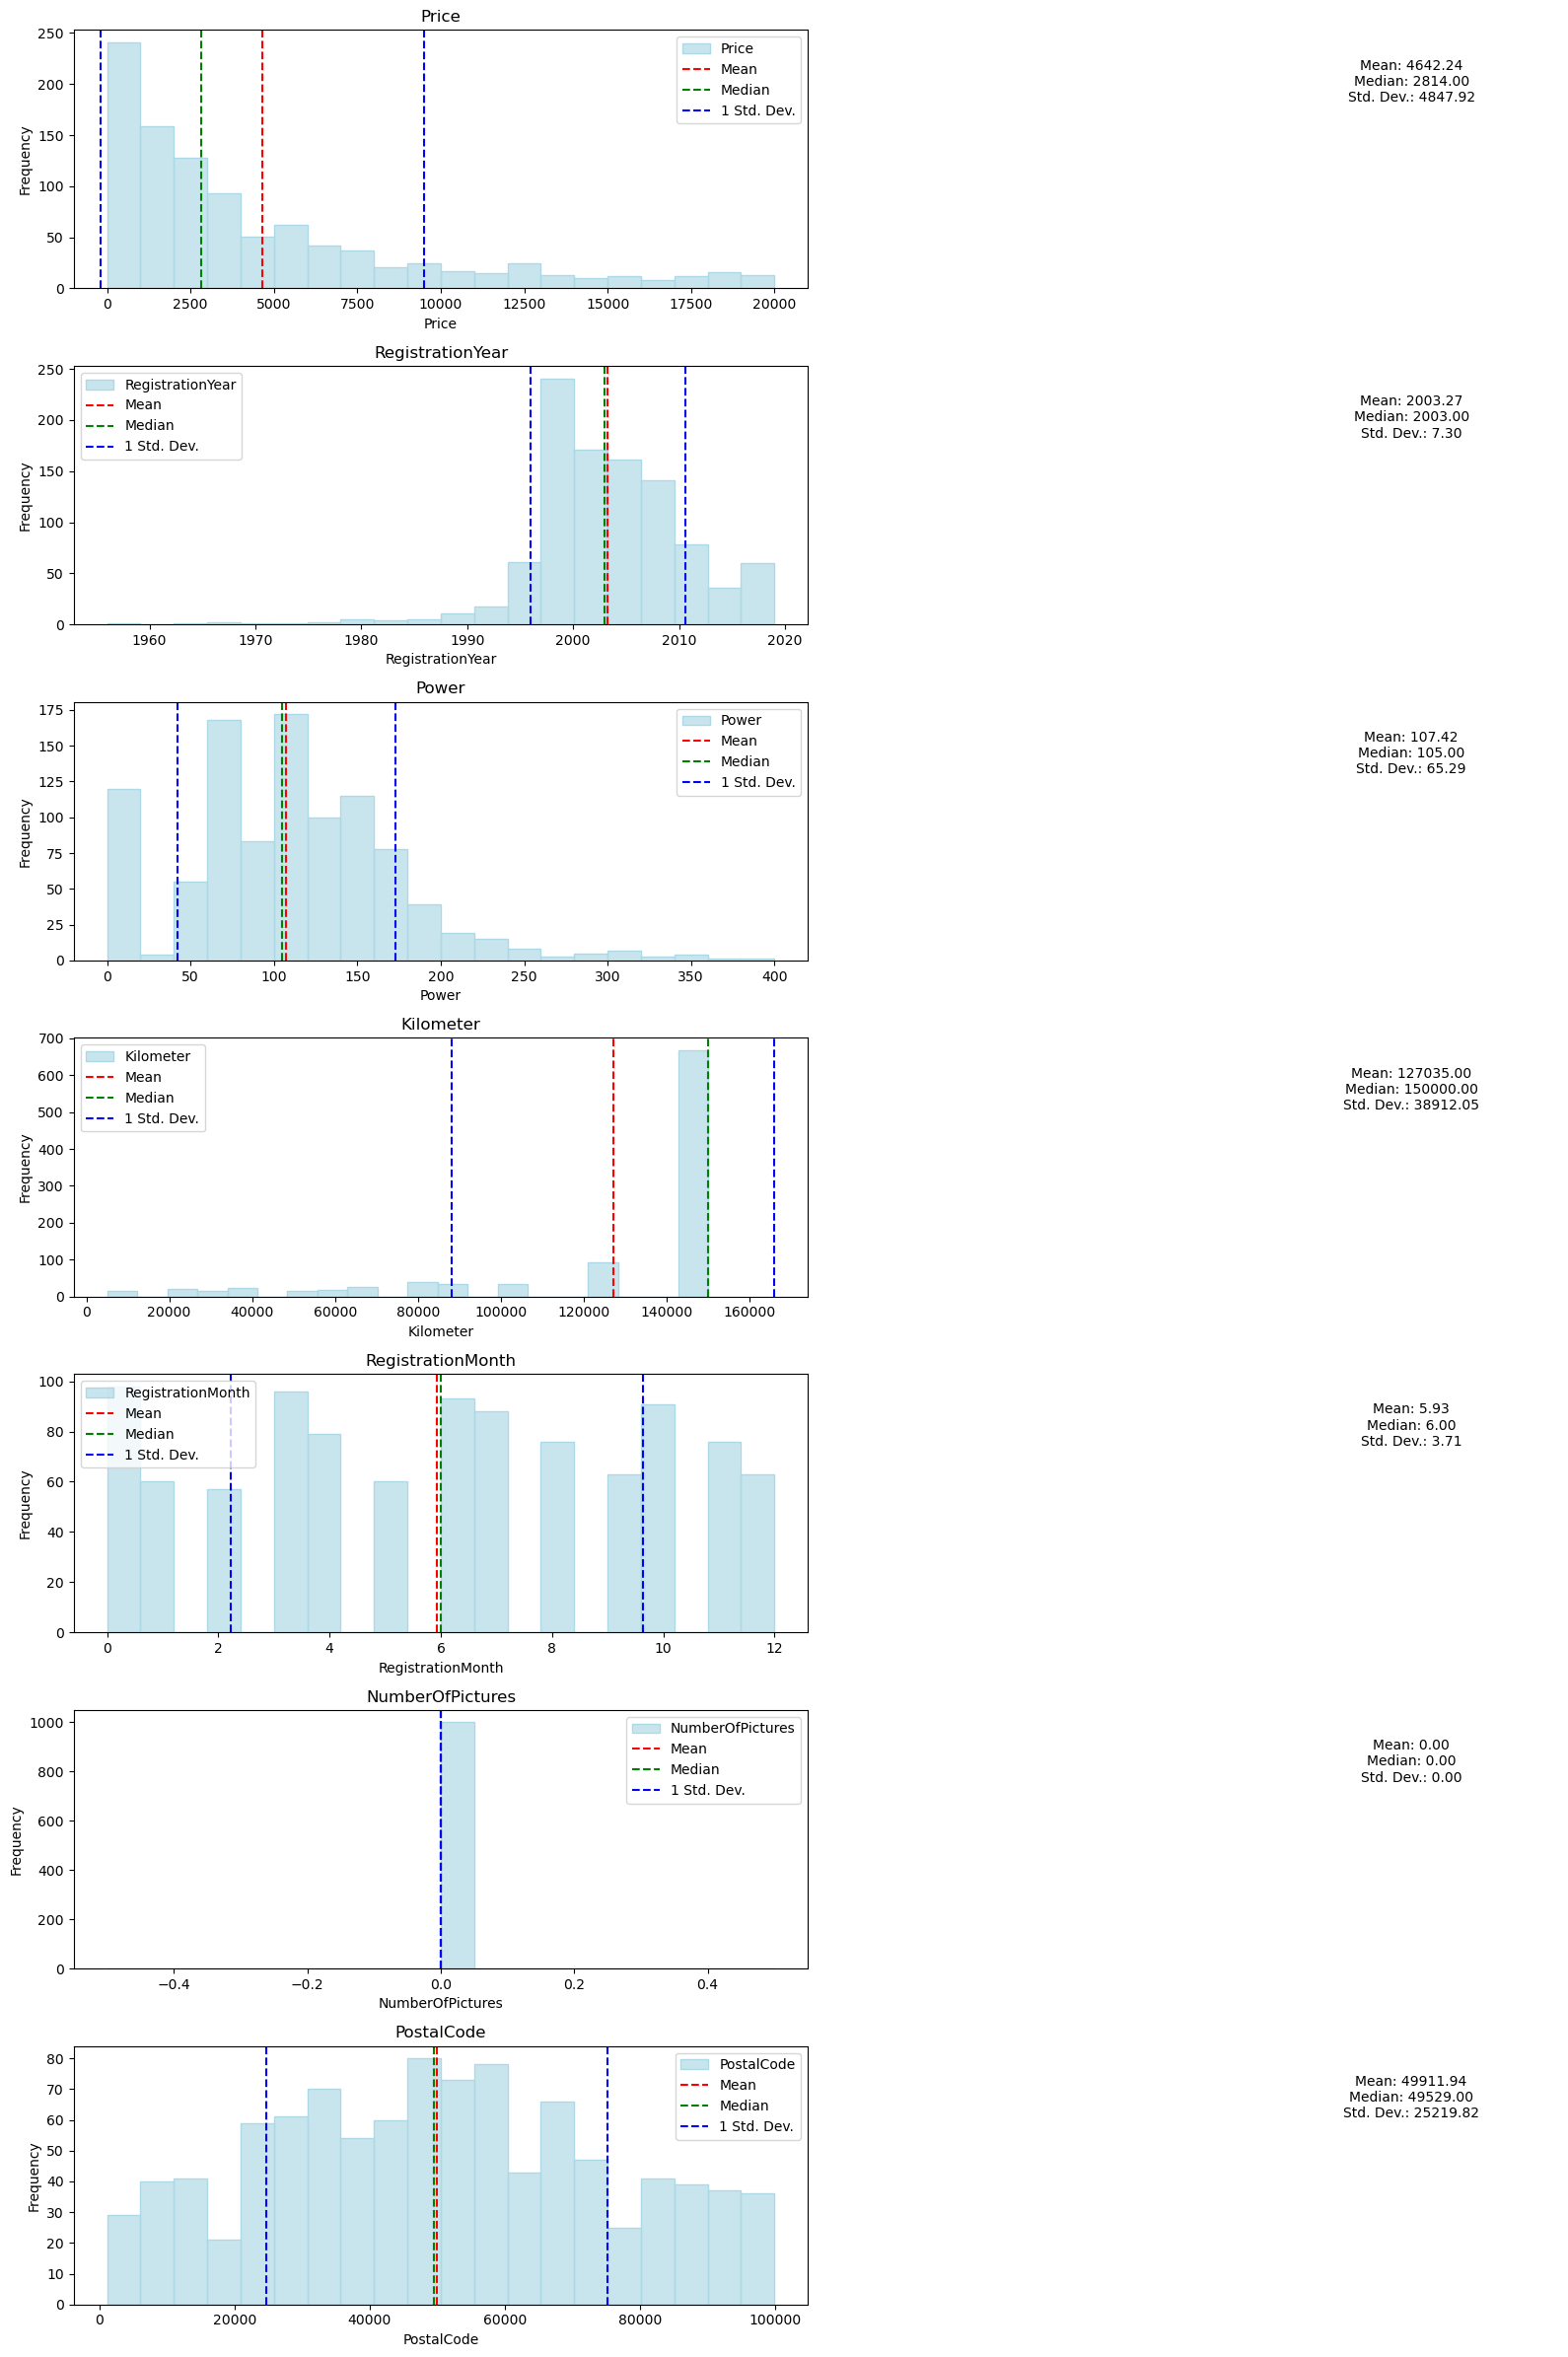

In [38]:
numeric_cols = ['Price', 'RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth', 'NumberOfPictures', 'PostalCode']

fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(16, 24))

for i, col in enumerate(numeric_cols):
    data_sample[col].plot(kind='hist', ax=axes[i, 0], title=col, color='#ADD8E6AA', edgecolor='#ADD8E6', bins=20)
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')
    
    # Добавляем линии
    mean = data_sample[col].mean()
    median = data_sample[col].median()
    std = data_sample[col].std()
    
    axes[i, 0].axvline(mean, color='r', linestyle='--', label='Mean')
    axes[i, 0].axvline(median, color='g', linestyle='--', label='Median')
    axes[i, 0].axvline(mean - std, color='b', linestyle='--', label='1 Std. Dev.')
    axes[i, 0].axvline(mean + std, color='b', linestyle='--')
    axes[i, 0].legend()

    # Добавляем статистики
    stats_text = f'Mean: {mean:.2f}\nMedian: {median:.2f}\nStd. Dev.: {std:.2f}'
    axes[i, 1].text(0.8, 0.8, stats_text, transform=axes[i, 1].transAxes, 
                   ha='center', va='center', fontsize=10)
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

Посмотрим как распределяются некоторые числовые и категориальные признаки. 

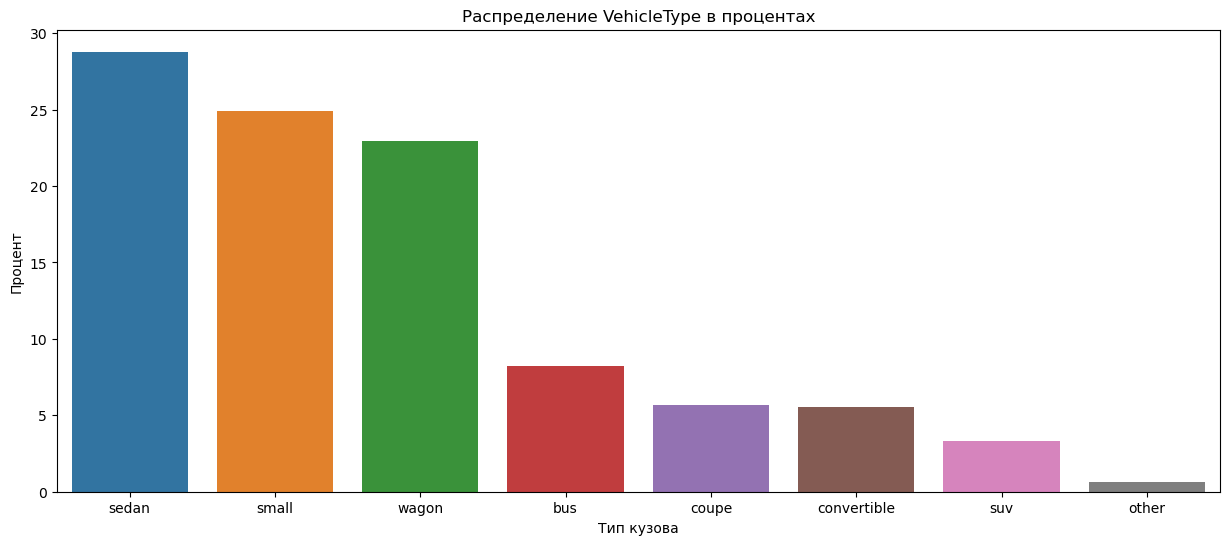

In [39]:
# Рассчитываем частоты в процентах
value_counts_normalized = data_sample['VehicleType'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['VehicleType', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='VehicleType', y='frequency', data=value_counts_normalized)
plt.title('Распределение VehicleType в процентах')
plt.xlabel('Тип кузова')
plt.ylabel('Процент')
plt.show()

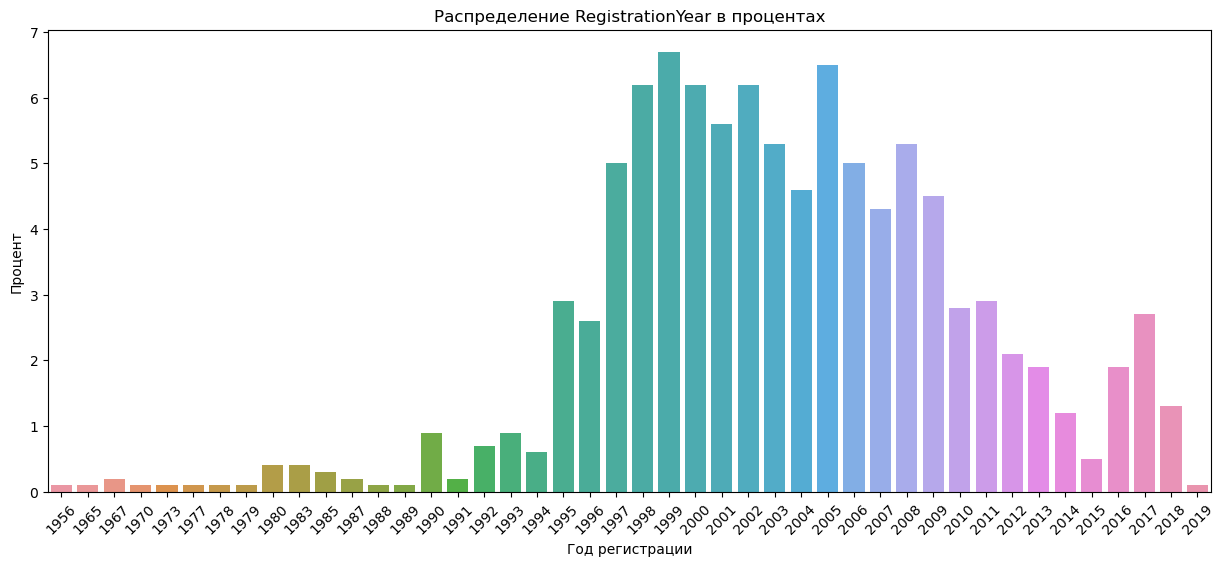

In [40]:
# Рассчитываем частоты в процентах
value_counts_normalized = data_sample['RegistrationYear'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['RegistrationYear', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='RegistrationYear', y='frequency', data=value_counts_normalized)
plt.title('Распределение RegistrationYear в процентах')
plt.xlabel('Год регистрации')
plt.ylabel('Процент')
# Поворот подписей на оси X на 45 градусов
plt.xticks(rotation=45)
plt.show()

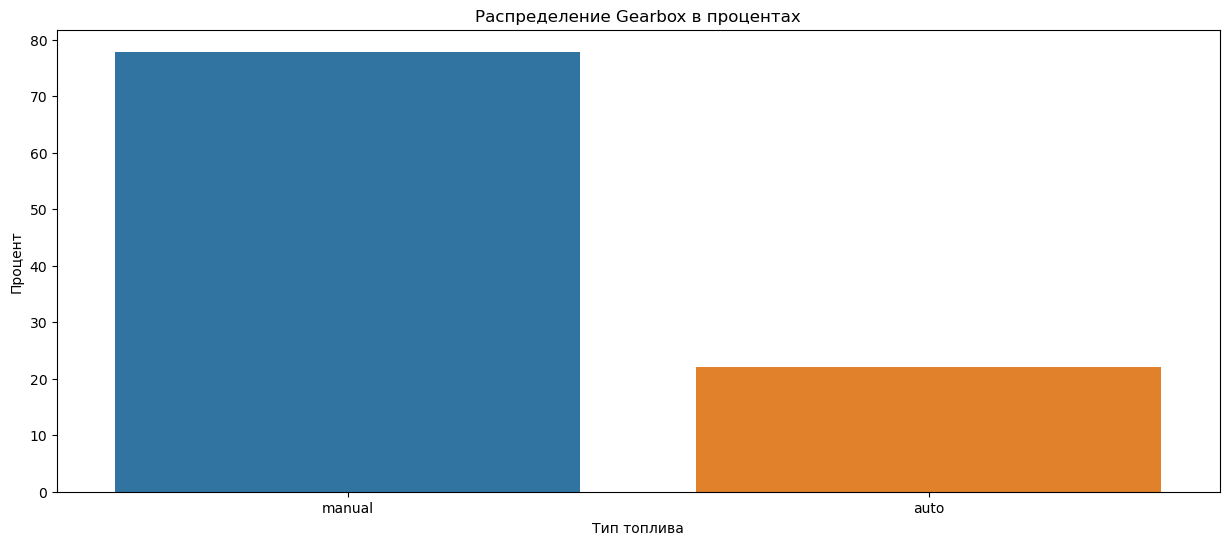

In [41]:
# Рассчитываем частоты в процентах
value_counts_normalized = data_sample['Gearbox'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['Gearbox', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='Gearbox', y='frequency', data=value_counts_normalized)
plt.title('Распределение Gearbox в процентах')
plt.xlabel('Тип топлива')
plt.ylabel('Процент')
plt.show()

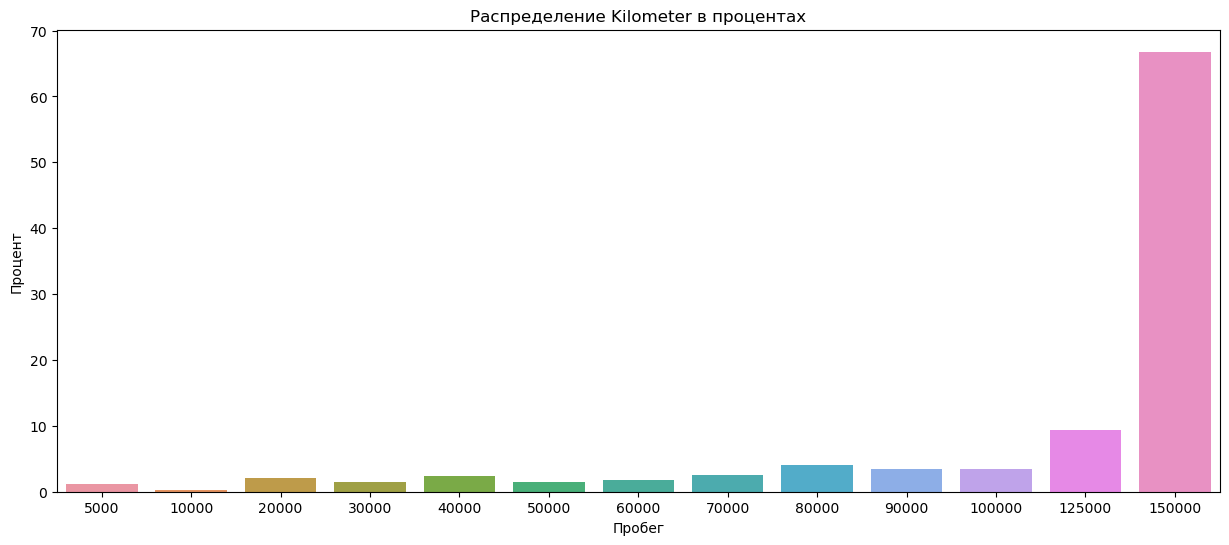

In [42]:
# Рассчитываем частоты в процентах
value_counts_normalized = data_sample['Kilometer'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['Kilometer', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='Kilometer', y='frequency', data=value_counts_normalized)
plt.title('Распределение Kilometer в процентах')
plt.xlabel('Пробег')
plt.ylabel('Процент')
plt.show()

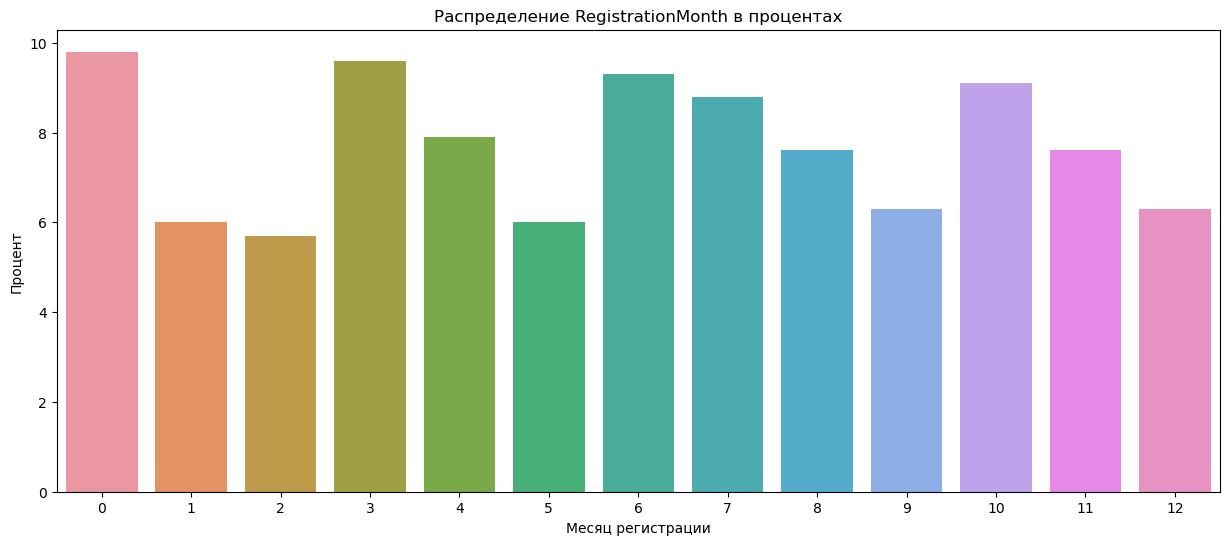

In [43]:
# Рассчитываем частоты в процентах
value_counts_normalized = data_sample['RegistrationMonth'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['RegistrationMonth', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='RegistrationMonth', y='frequency', data=value_counts_normalized)
plt.title('Распределение RegistrationMonth в процентах')
plt.xlabel('Месяц регистрации')
plt.ylabel('Процент')
plt.show()

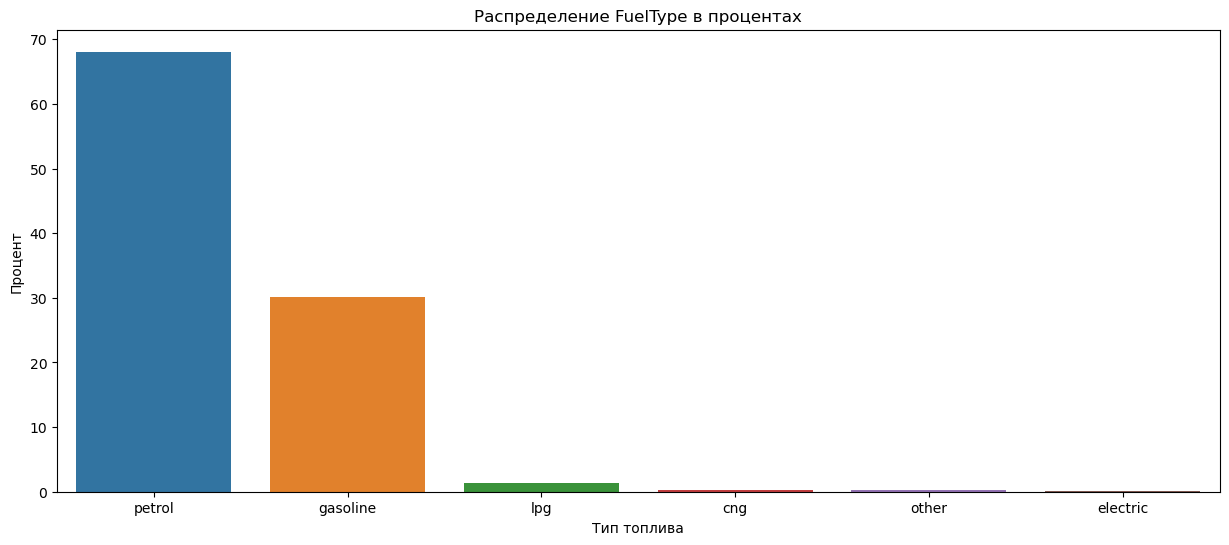

In [44]:
# Рассчитываем частоты в процентах
value_counts_normalized = data_sample['FuelType'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['FuelType', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='FuelType', y='frequency', data=value_counts_normalized)
plt.title('Распределение FuelType в процентах')
plt.xlabel('Тип топлива')
plt.ylabel('Процент')
plt.show()

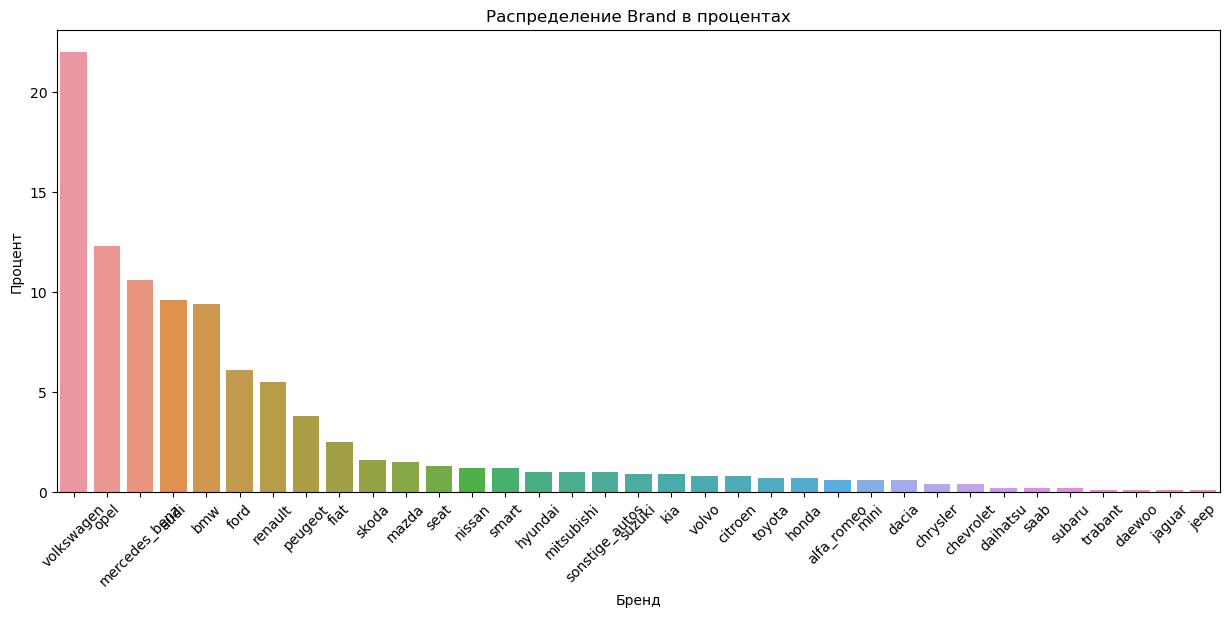

In [45]:
# Рассчитываем частоты в процентах
value_counts_normalized = data_sample['Brand'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['Brand', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='Brand', y='frequency', data=value_counts_normalized)
plt.title('Распределение Brand в процентах')
plt.xlabel('Бренд')
plt.ylabel('Процент')
# Поворот подписей на оси X на 45 градусов
plt.xticks(rotation=45)
plt.show()

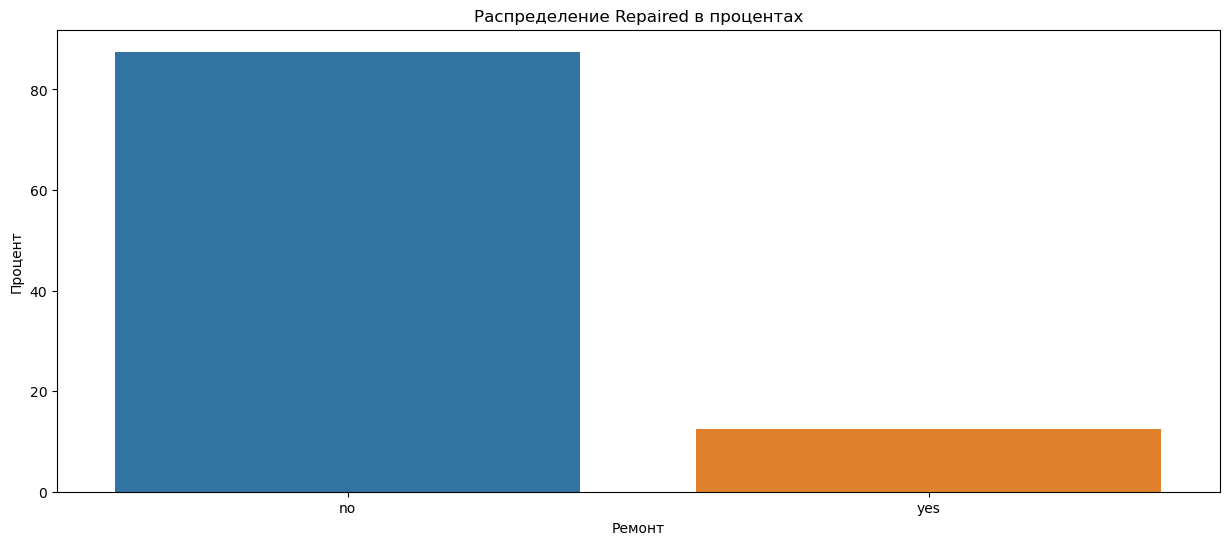

In [46]:
# Рассчитываем частоты в процентах
value_counts_normalized = data_sample['Repaired'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['Repaired', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='Repaired', y='frequency', data=value_counts_normalized)
plt.title('Распределение Repaired в процентах')
plt.xlabel('Ремонт')
plt.ylabel('Процент')
plt.show()

Посмотрим на соотношение целевого признака с остальными признаками

<Axes: title={'center': 'violinplot: Price ratio with VehicleType'}, xlabel='VehicleType', ylabel='Price'>

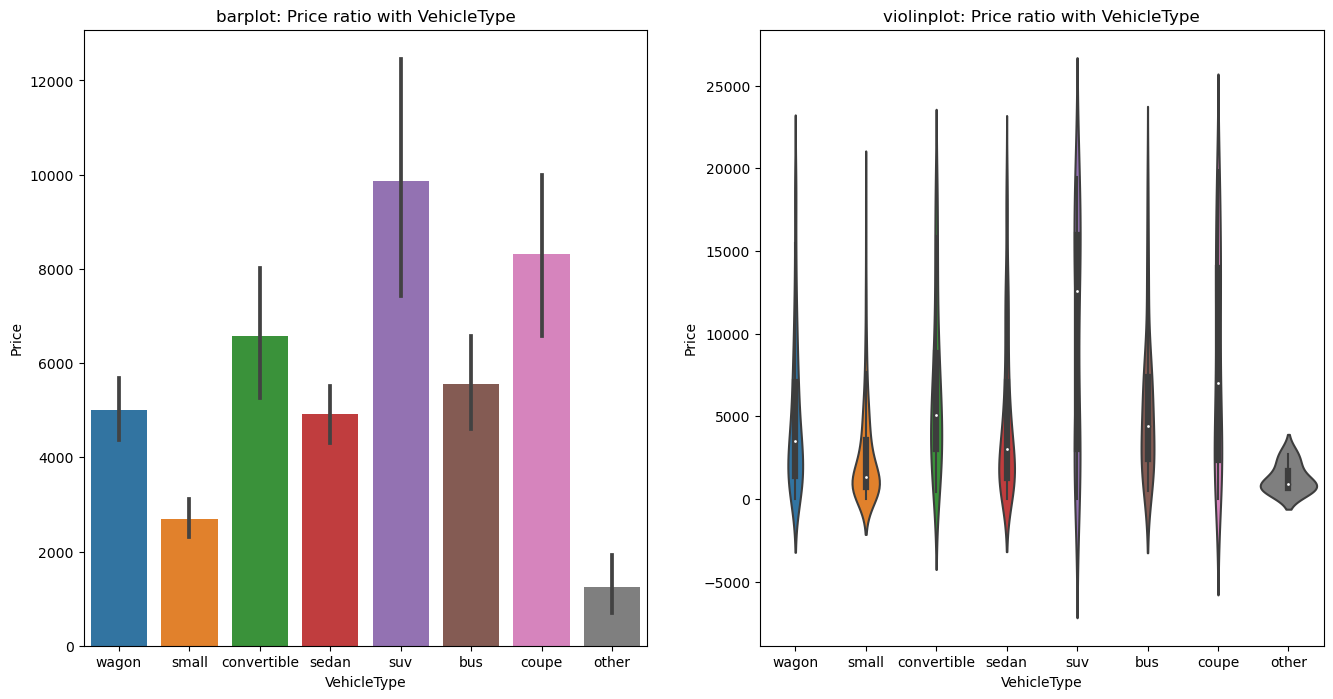

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].set_title('barplot: Price ratio with VehicleType')
sns.barplot(x=data_sample['VehicleType'], y=data_sample['Price'], ax=ax[0])

ax[1].set_title('violinplot: Price ratio with VehicleType')
sns.violinplot(x=data_sample['VehicleType'], y=data_sample['Price'], ax=ax[1])


<Axes: title={'center': 'violinplot: Price ratio with Gearbox'}, xlabel='Gearbox', ylabel='Price'>

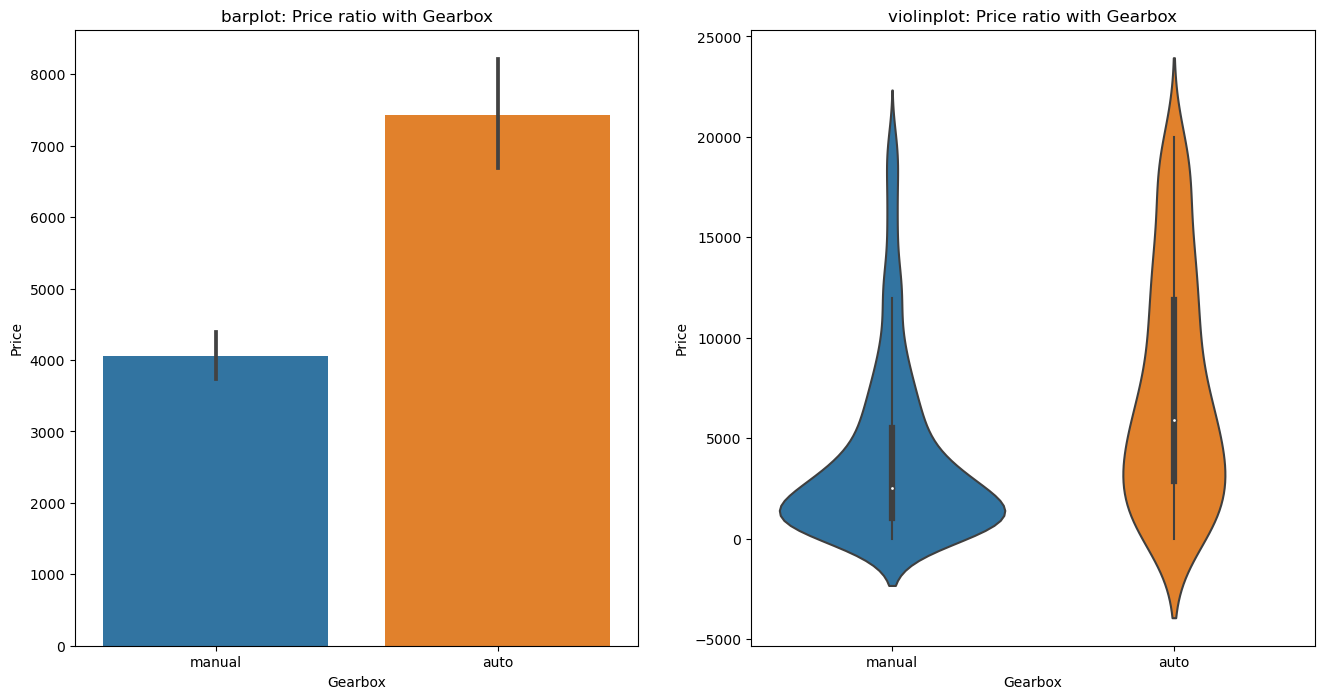

In [48]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].set_title('barplot: Price ratio with Gearbox')
sns.barplot(x= data_sample['Gearbox'], y=data_sample['Price'],ax=ax[0])

ax[1].set_title('violinplot: Price ratio with Gearbox')
sns.violinplot(x=data_sample['Gearbox'],y=data_sample['Price'], ax=ax[1])

<Axes: title={'center': 'violinplot: Price ratio with Kilometer'}, xlabel='Kilometer', ylabel='Price'>

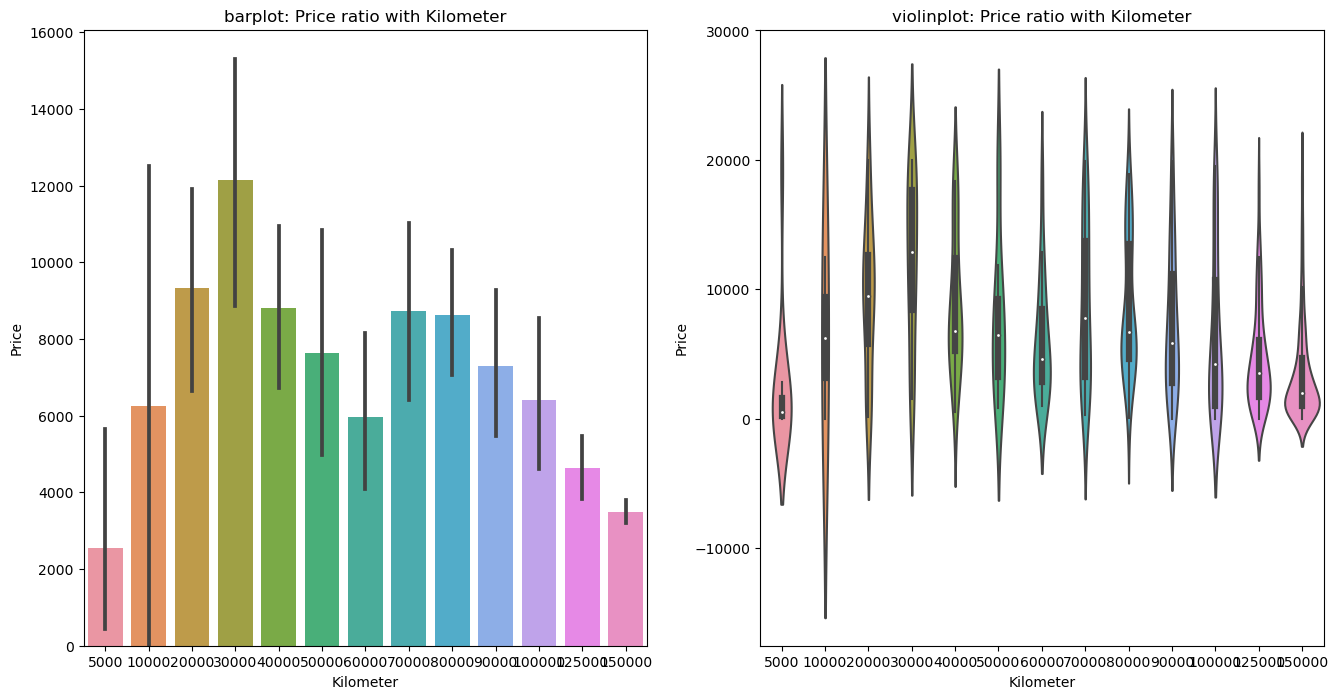

In [49]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].set_title('barplot: Price ratio with Kilometer')
sns.barplot(x= data_sample['Kilometer'], y=data_sample['Price'],ax=ax[0])

ax[1].set_title('violinplot: Price ratio with Kilometer')
sns.violinplot(x=data_sample['Kilometer'],y=data_sample['Price'], ax=ax[1])

<Axes: title={'center': 'violinplot: Price ratio with FuelType'}, xlabel='FuelType', ylabel='Price'>

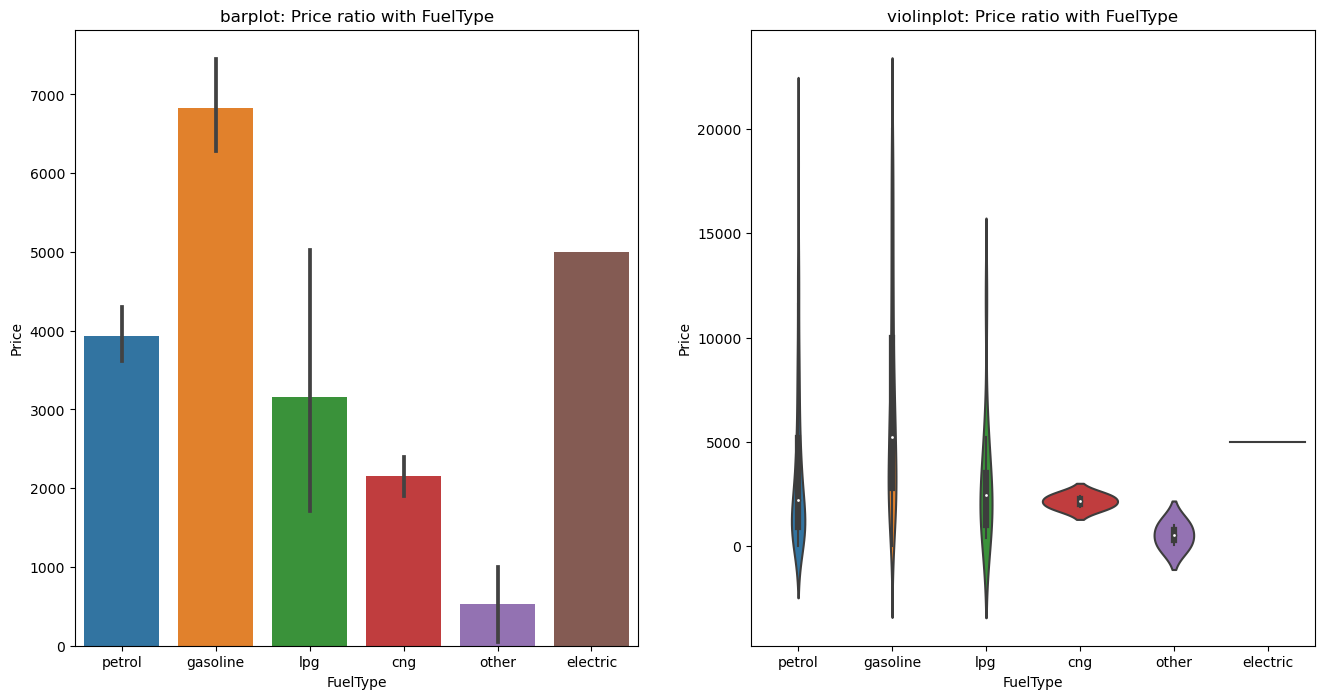

In [50]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].set_title('barplot: Price ratio with FuelType')
sns.barplot(x= data_sample['FuelType'], y=data_sample['Price'],ax=ax[0])

ax[1].set_title('violinplot: Price ratio with FuelType')
sns.violinplot(x=data_sample['FuelType'],y=data_sample['Price'], ax=ax[1])

<Axes: title={'center': 'violinplot: Price ratio with Repaired'}, xlabel='Repaired', ylabel='Price'>

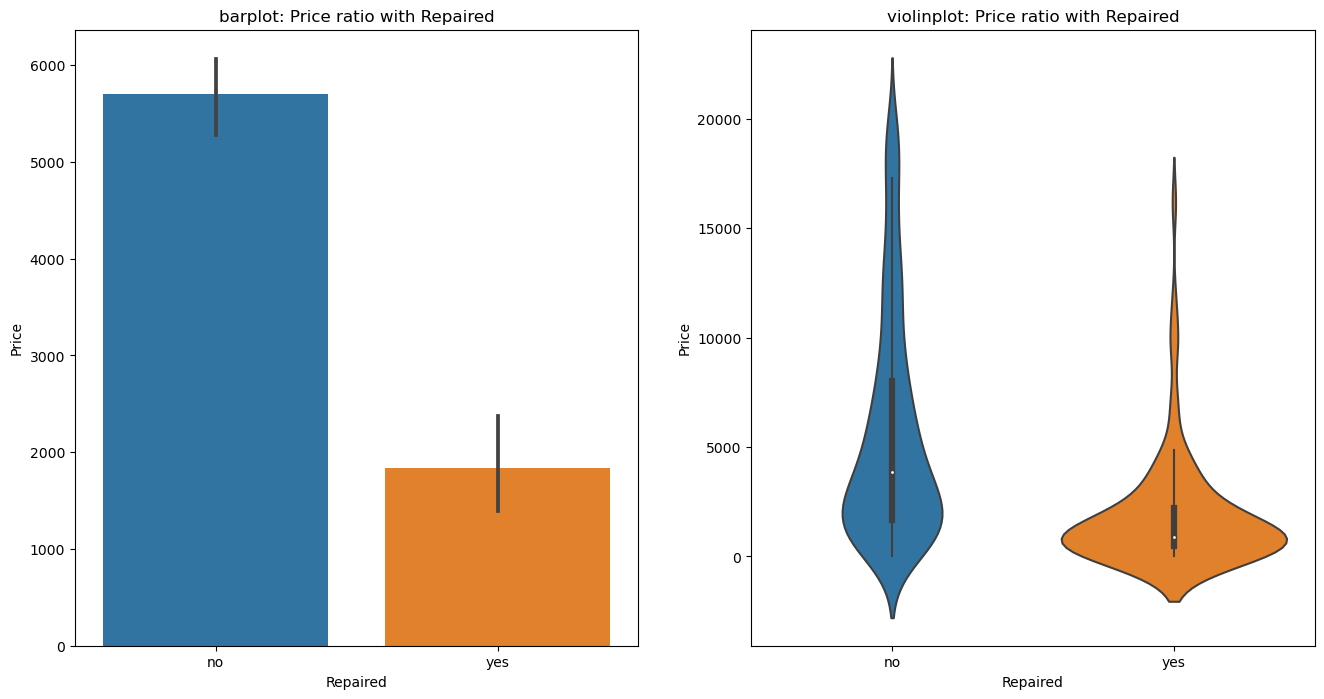

In [51]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].set_title('barplot: Price ratio with Repaired')
sns.barplot(x= data_sample['Repaired'], y=data_sample['Price'],ax=ax[0])

ax[1].set_title('violinplot: Price ratio with Repaired')
sns.violinplot(x=data_sample['Repaired'],y=data_sample['Price'], ax=ax[1])

Проведем корреляционный анализ.

In [52]:
corr_matrix_df = data_sample.phik_matrix(interval_cols=['Price', 'RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth', 'NumberOfPictures', 'PostalCode'])
corr_matrix_df.round(2)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen
DateCrawled,1.00,0.97,1.00,0.98,1.00,0.96,1.00,1.00,0.95,1.00,1.00,1.00,1.00,0.97,1.00
Price,0.97,1.00,0.30,0.69,0.38,0.60,0.64,0.34,0.17,0.24,0.35,0.38,0.13,0.00,0.50
VehicleType,1.00,0.30,1.00,0.45,0.25,0.51,0.92,0.14,0.00,0.43,0.56,0.09,0.00,0.09,0.00
RegistrationYear,0.98,0.69,0.45,1.00,0.11,0.36,0.70,0.45,0.18,0.57,0.29,0.22,0.17,0.04,0.88
Gearbox,1.00,0.38,0.25,0.11,1.00,0.66,0.65,0.00,0.00,0.25,0.54,0.09,0.06,0.14,0.22
Power,0.96,0.60,0.51,0.36,0.66,1.00,0.85,0.14,0.25,0.30,0.50,0.05,0.00,0.15,0.00
Model,1.00,0.64,0.92,0.70,0.65,0.85,1.00,0.58,0.00,0.56,1.00,0.00,0.00,0.18,1.00
Kilometer,1.00,0.34,0.14,0.45,0.00,0.14,0.58,1.00,0.00,0.28,0.33,0.05,0.00,0.00,0.99
RegistrationMonth,0.95,0.17,0.00,0.18,0.00,0.25,0.00,0.00,1.00,0.09,0.17,0.06,0.00,0.00,0.69
FuelType,1.00,0.24,0.43,0.57,0.25,0.30,0.56,0.28,0.09,1.00,0.60,0.00,0.00,0.08,1.00


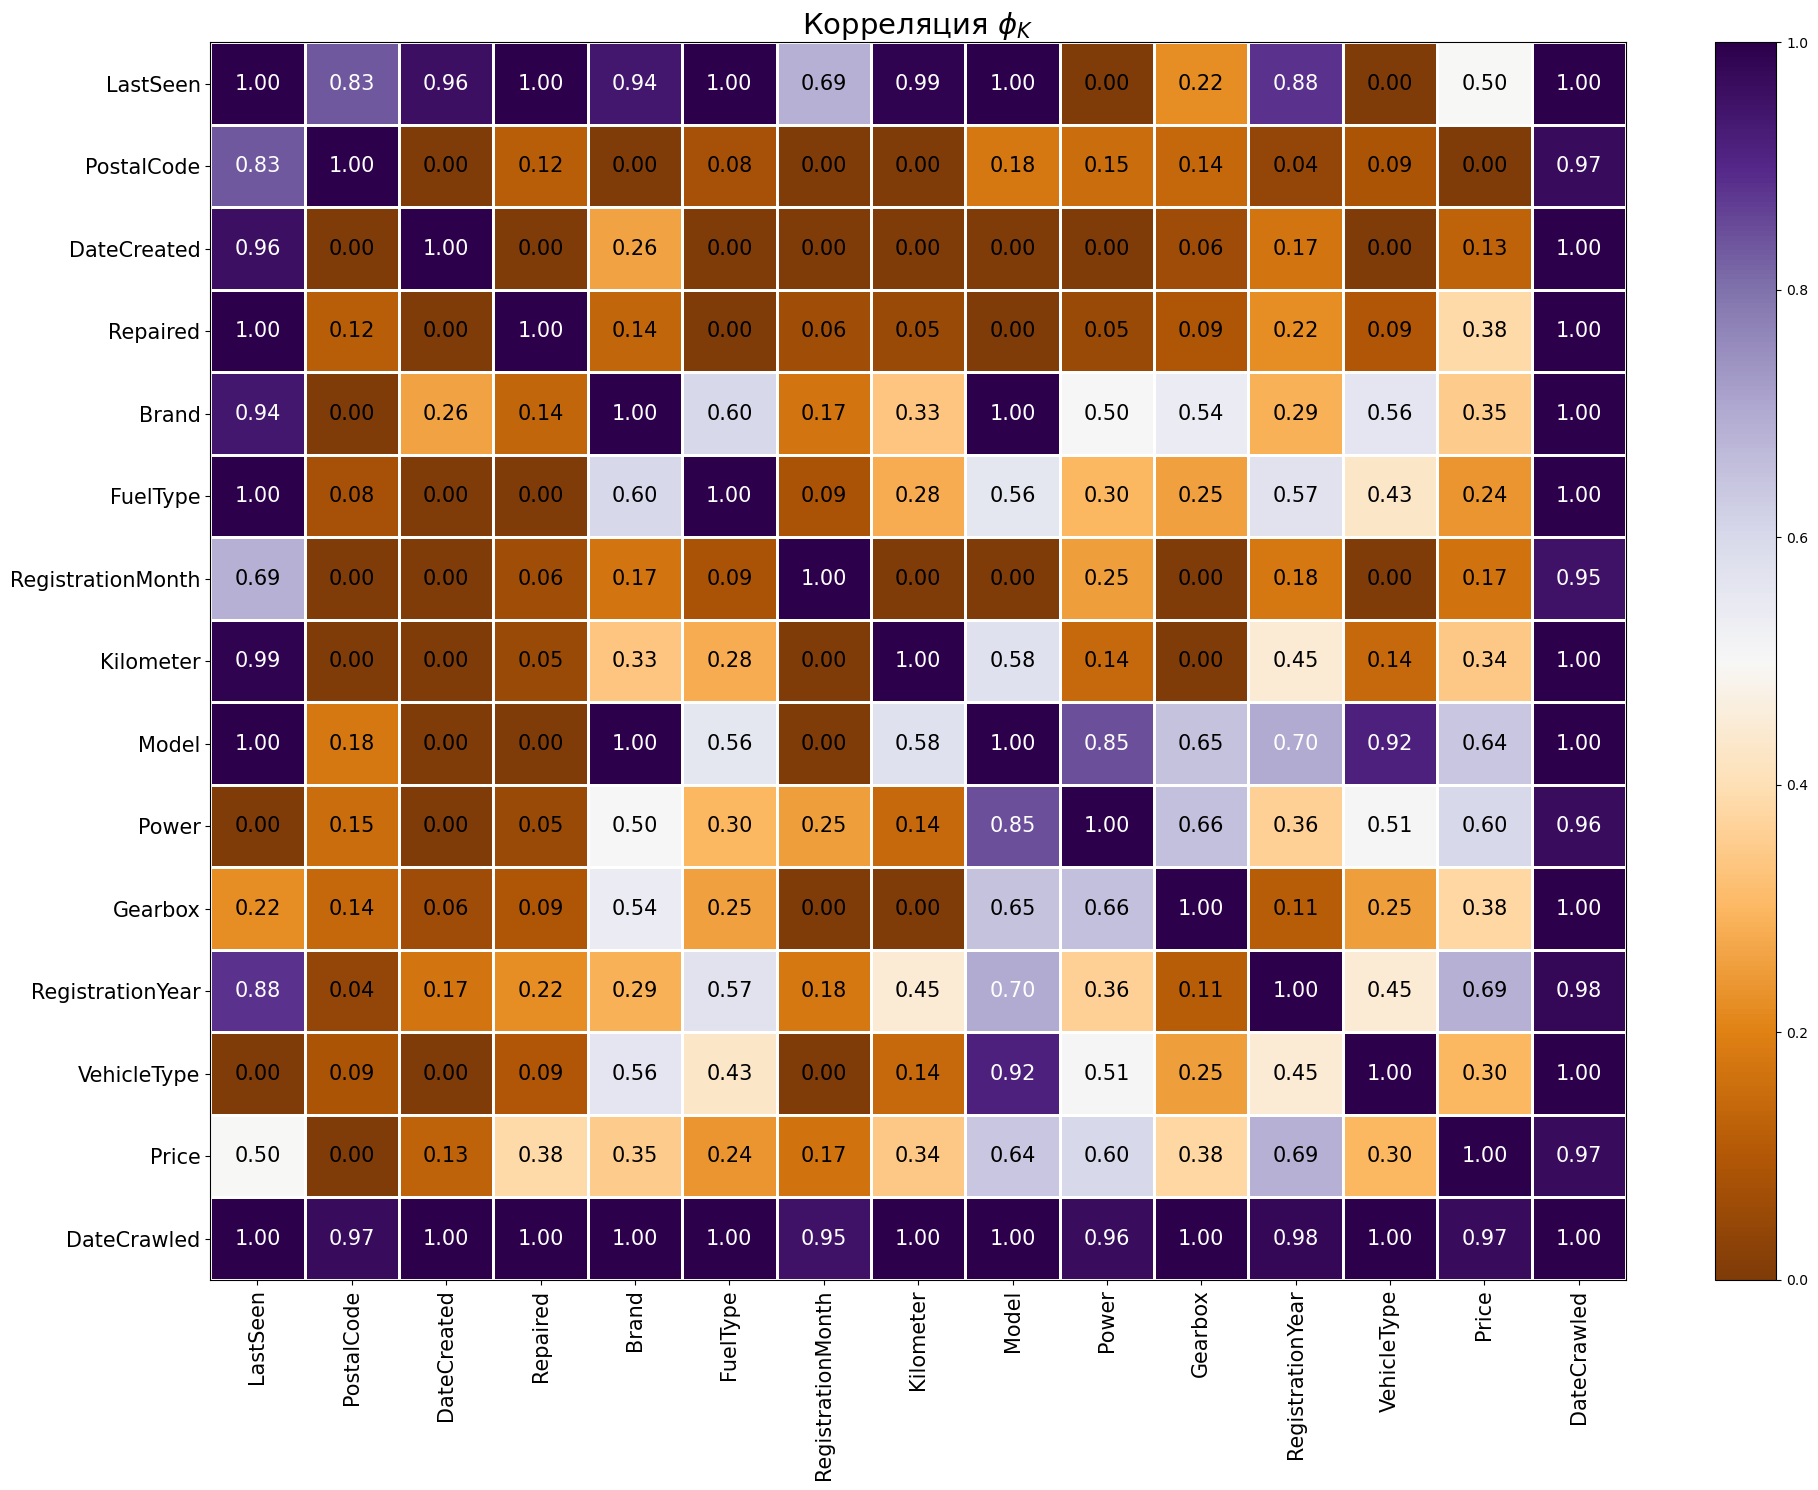

In [53]:
plot_correlation_matrix(
    corr_matrix_df.values,
    x_labels=corr_matrix_df.columns,
    y_labels=corr_matrix_df.index,
    vmin=0, vmax=1, color_map='PuOr', 
    title=r'Корреляция $\phi_K$',  
    fontsize_factor=1.5,  
    figsize=(20, 15)
)

Посмотрим как распределяются числовые признаки по отношению к целевому.

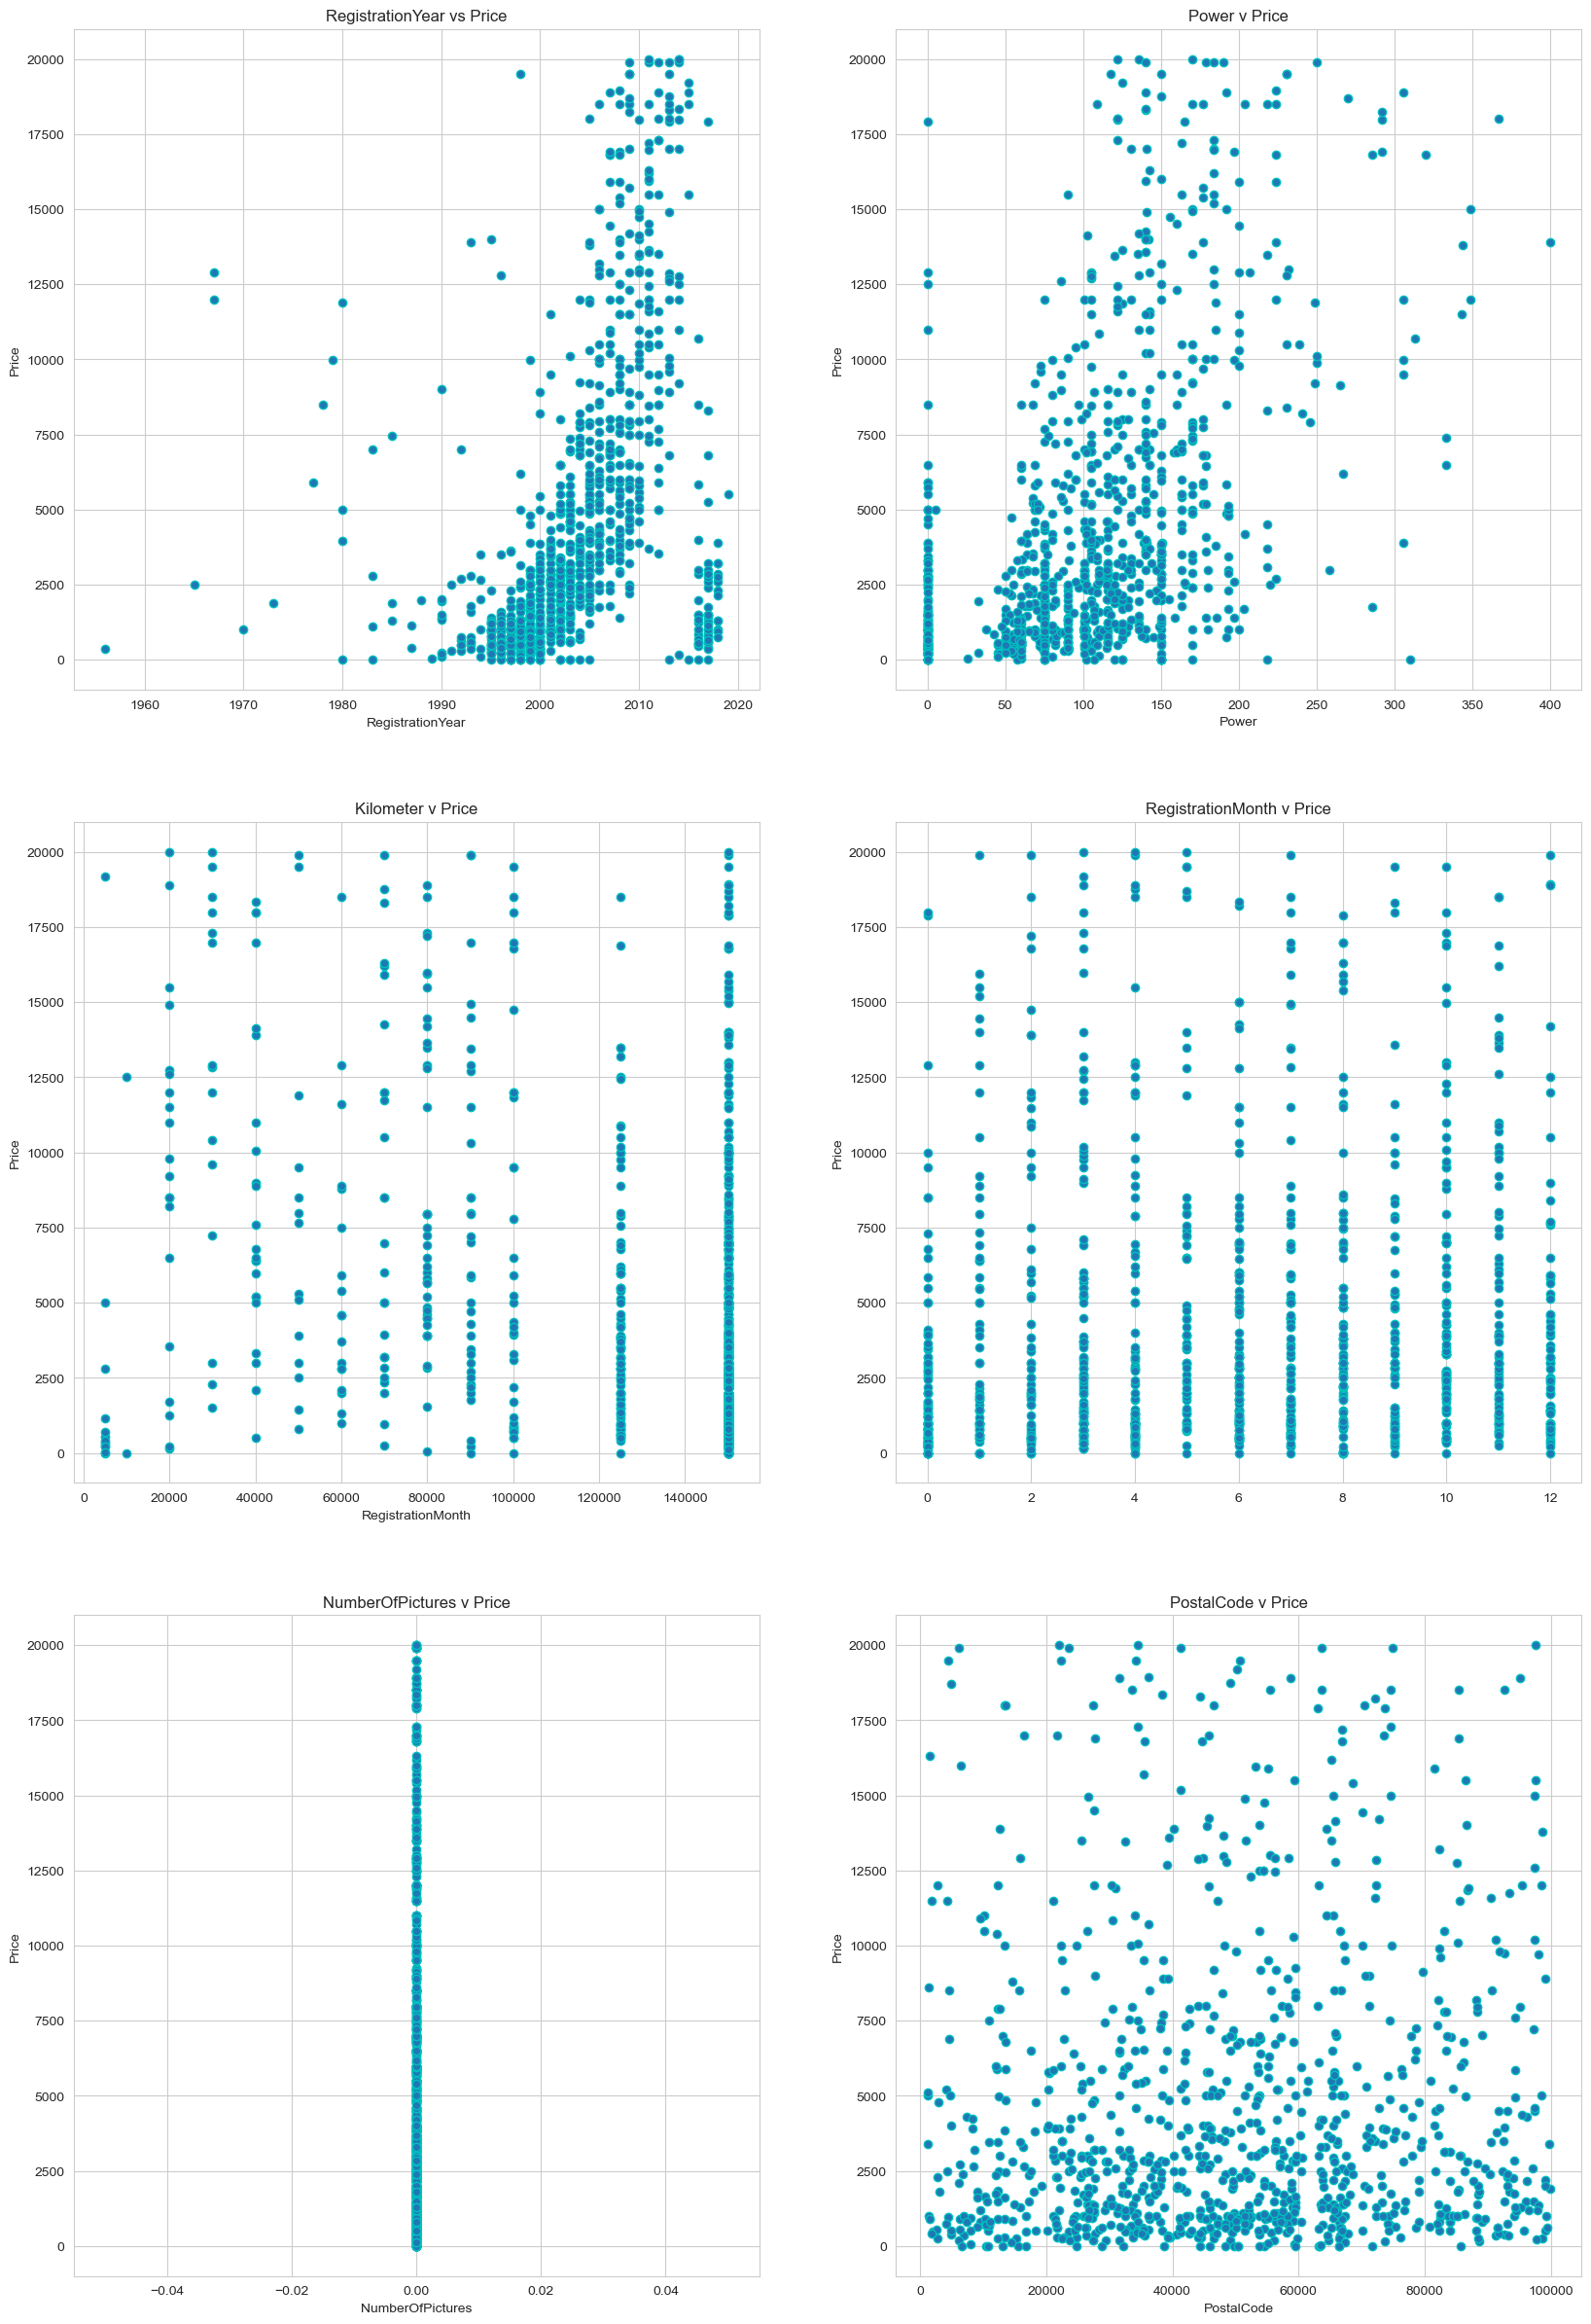

In [54]:
# Suplots of numeric features v price
sns.set_style('whitegrid')
f, axes = plt.subplots(3,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'RegistrationYear', y = 'Price', data = data_sample, edgecolor='c')
axes[0,0].set_xlabel('RegistrationYear')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('RegistrationYear vs Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Power', y = 'Price', data = data_sample, edgecolor = 'c')
axes[0,1].set_xlabel('Power')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Power v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Kilometer', y = 'Price', data = data_sample, edgecolor = 'c')
axes[1,0].set_xlabel('Kilometer')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Kilometer v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'RegistrationMonth', y = 'Price', data = data_sample, edgecolor = 'c')
axes[1,0].set_xlabel('RegistrationMonth')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('RegistrationMonth v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'NumberOfPictures', y = 'Price', data = data_sample, edgecolor = 'c')
axes[2,0].set_xlabel('NumberOfPictures')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('NumberOfPictures v Price')

# Plot [2,1c
axes[2,1].scatter(x = 'PostalCode', y = 'Price', data = data_sample, edgecolor = 'c')
axes[2,1].set_xlabel('PostalCode')
axes[2,1].set_ylabel('Price')
axes[2,1].set_title('PostalCode v Price')

plt.show()

##### Выводы:

1. Числовые данные не распределены нормально и имеют выбросы. 
2. Числовые признаки имеют разный диапазон. Для использования в машинном обучении их требуется стандартизировать. 
3. Корреляция аттрибутов между собой и с целевым признаком слабая. Наибольшей  корреляцией с целевым признаком обладают признаки RegistrationYear, DateCrawled модель и мощность автомобиля.
4. Анализ текстовых категриальных признаков Model и Brand выявил неявное совпадение значений range_rover и rangerover в признаке Model. Эти значения следует объеденить в range_rover.

Атрибут Power содержит более 11% значений с мощностью двигателя выходящую за пределы известных значейни. Например, меньше, чем у самого маломощного автомобиля, у которого мощность двигателя равна 0.75 л.с. Также атрибут Power содержит значения мощности двигателя более 5000 л.с.. Это превышает мощность самого мощного автомобиля Devel Sixteen . 

Произведем предподготовку данных

In [55]:
# Замена значения "other" на "no_value" 
# для унификации отсутствующей информации 
# в признаках "VehicleType" и "FuellType"
data_all.loc[
    (data_all['VehicleType'] == 'other') | 
    (data_all['FuelType'] == 'other') |
    (data_all['Model'] == 'other'), 
    ['VehicleType', 'FuelType', 'Model'] 
] = 'no_value' 

Считаю, что признаки с невысокой корреляцией и корреляцией 0,9-1  нужно удалить. 
* 'DateCrawled'корреляция с целевым признаком 0,97, что может свидетельствовать о мультиколлинеарности
* 'RegistrationMonth' корреляция с целевым признаком 0,17
* 'DateCreated' корреляция с целевым признаком 0,13
* 'NumberOfPictures'неинформативный столбец, заполненный только одним значением 
* 'PostalCode' корреляция с целевым признаком 0,00
* 'LastSeen' корреляция с целевым признаком 0,5


In [56]:
# Удаление неинформативных признаков
data_all = data_all.drop([
    'DateCrawled', 
    'RegistrationMonth', 
    'DateCreated', 
    'NumberOfPictures', 
    'PostalCode',
    'LastSeen'
], axis=1)

Удалили строки с аномально низкими ценами и аномальными значениями в столбце год регистрации. Устранили неявные дубликаты.

In [57]:
# Объединение неявно совпадающих значений признака "Model" 
# "range_rover" и "rangerover" в "range_rover"
data_all.loc[data_all['Model'] == 'rangerover', 'Model'] = 'range_rover'


In [58]:
# Объединение неявно совпадающих значений признака "FuelType" 
# "petrol" и "gasoline" в "petrol"
data_all.loc[data_all['FuelType'] == 'gasoline', 'FuelType'] = 'petrol'

In [59]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354369 non-null  int16 
 1   VehicleType       318767 non-null  object
 2   RegistrationYear  354369 non-null  int16 
 3   Gearbox           334536 non-null  object
 4   Power             354369 non-null  int16 
 5   Model             335190 non-null  object
 6   Kilometer         354369 non-null  int32 
 7   FuelType          323722 non-null  object
 8   Brand             354369 non-null  object
 9   Repaired          283215 non-null  object
dtypes: int16(3), int32(1), object(6)
memory usage: 19.6+ MB


Еще раз посмотрим на распределение целевого признака и признака мощность. Заметны большие выбросы, которые мы, как уже говорилось, будем обрабатывать в наших моделях.

In [60]:
data_all[['Power', 'Price']].describe()

,Power,Price
count,354369.000000,354369.000000
mean,110.094337,4416.656776
std,189.850405,4514.158514
min,0.000000,0.000000
25%,69.000000,1050.000000
50%,105.000000,2700.000000
75%,143.000000,6400.000000
max,20000.000000,20000.000000


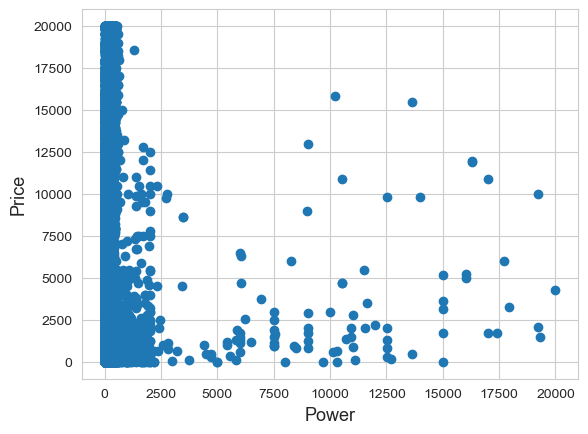

In [61]:
fig, ax = plt.subplots()
ax.scatter(x = data_all['Power'], y = data_all['Price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Power', fontsize=13)
plt.show()

Целевая переменная
Цена продажи - это переменная, которую нам нужно предсказать. Итак, давайте сначала проведем некоторый анализ этой переменной.


 mu = 4416.66 and sigma = 4514.15



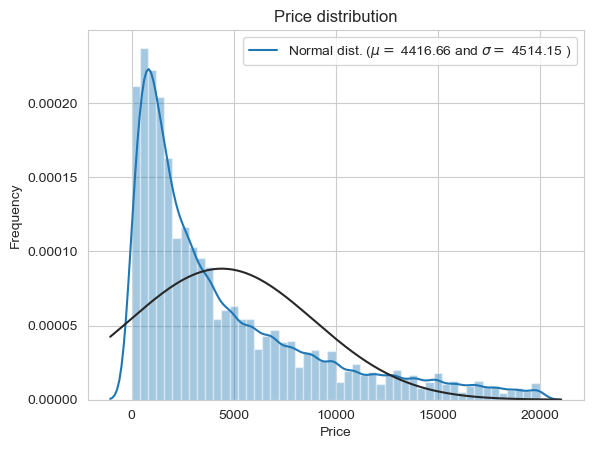

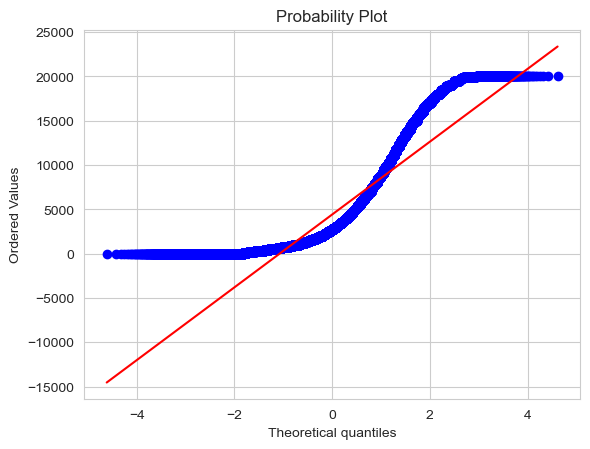

In [62]:
data_all_c = data_all.copy()
sns.distplot(data_all_c['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data_all_c['Price'] )
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data_all_c['Price'], plot=plt)
plt.show()

Целевая переменная имеет правый перекос. Поскольку (линейные) модели используют нормально распределенные данные, нам нужно преобразовать эту переменную и сделать ее более нормально распределенной.


 mu = 7.62 and sigma = 1.81



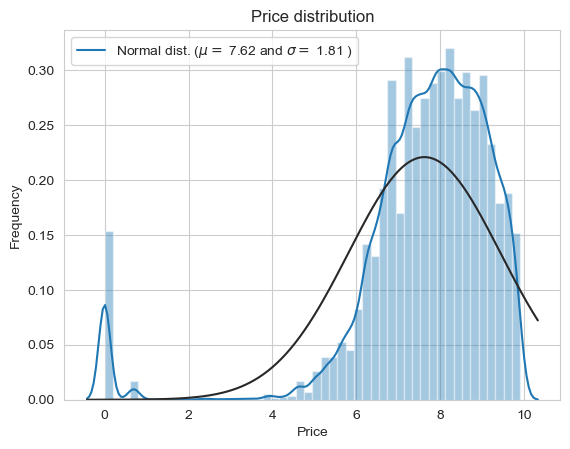

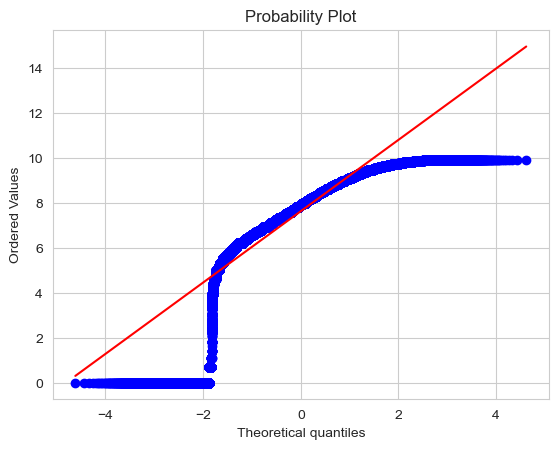

In [63]:
data_all_c['Price']  = np.log1p(data_all_c['Price'])

#Check the new distribution 
sns.distplot(data_all_c['Price']  , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data_all_c['Price'] )
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data_all_c['Price'] , plot=plt)
plt.show()

Для того, чтобы избавиться от правого хвоста в распределении цен, можно применить логарифмическое преобразование данных. Мы сделали это, применив функцию np.log1p() к столбцу 'Price' в DataFrame data_all_total. Это преобразование позволило сделать распределение более симметричным и нормальным.

Далее проверили новое распределение с помощью sns.distplot() и получили параметры нормального распределения: mu = 7.62 и sigma = 1.81. Эти параметры показывают, что распределение стало более симметричным и близким к нормальному, большее количество предсказанных значений цены разместилось на прямой.

Также построили Q-Q plot, который подтверждает, что распределение стало более нормальным после применения логарифмического преобразования. Для дальнейшей нормализации при построении моделей воспользуемся одним из методов: StandardScaler(), MinMaxScaler(), RobustScaler()

Произведем работу с пропущенными значениями.

In [64]:
data_all.isnull().sum()

Price                   0
VehicleType         35602
RegistrationYear        0
Gearbox             19833
Power                   0
Model               19179
Kilometer               0
FuelType            30647
Brand                   0
Repaired            71154
dtype: int64

In [65]:
all_data_na = (data_all.isnull().sum() / len(data_all)) * 100
all_data_na

Price                0.000000
VehicleType         10.046590
RegistrationYear     0.000000
Gearbox              5.596709
Power                0.000000
Model                5.412155
Kilometer            0.000000
FuelType             8.648330
Brand                0.000000
Repaired            20.079070
dtype: float64

Данные с пропусками:
VehicleType — тип автомобильного кузоваGearbox — тип коробки передачModel — модель автомобиляFuelType — тип топливаRepaired — была машина в ремонте или нет
Все признаки с пропусками категориального типа object. Для них будет использована категория no_value, указывающая на отсутствие значений.

In [66]:
all_data_na = (data_all.isnull().sum() / len(data_all)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
Repaired,20.079070
VehicleType,10.046590
FuelType,8.648330
Gearbox,5.596709
Model,5.412155


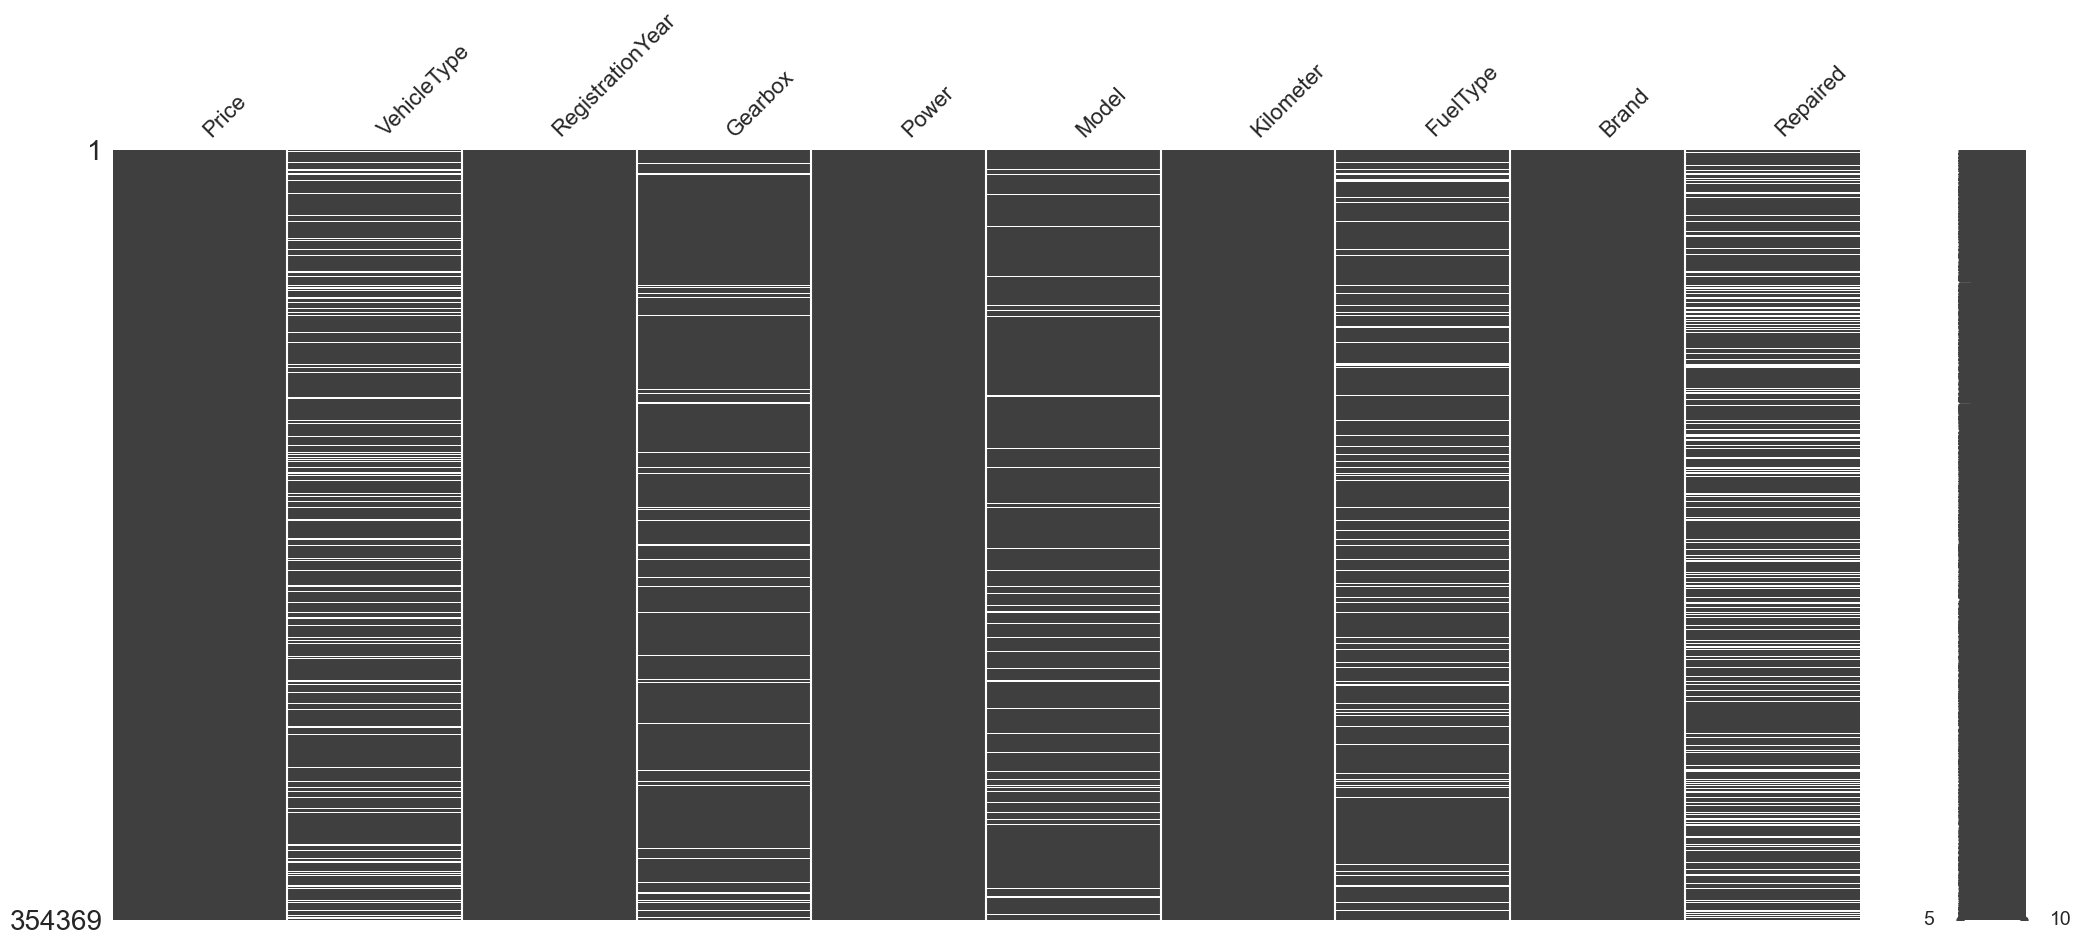

In [67]:
msno.matrix(data_all);

Распределение пропущенных значений в датасете выглядит случайным.
С помощью матрицы корреляции пропущенных значений определим насколько сильно присутствие или отсутствие значений одного признака влияет на присутствие значений другого.

In [68]:
df = data_all.iloc[:, [i for i, n in enumerate(np.var(data_all.isnull(), axis = 'rows')) if n > 0]]
df.isnull().corr()

,VehicleType,Gearbox,Model,FuelType,Repaired
VehicleType,1.000000,0.298791,0.202635,0.441269,0.289031
Gearbox,0.298791,1.000000,0.159938,0.278829,0.269865
Model,0.202635,0.159938,1.000000,0.238696,0.154365
FuelType,0.441269,0.278829,0.238696,1.000000,0.232661
Repaired,0.289031,0.269865,0.154365,0.232661,1.000000


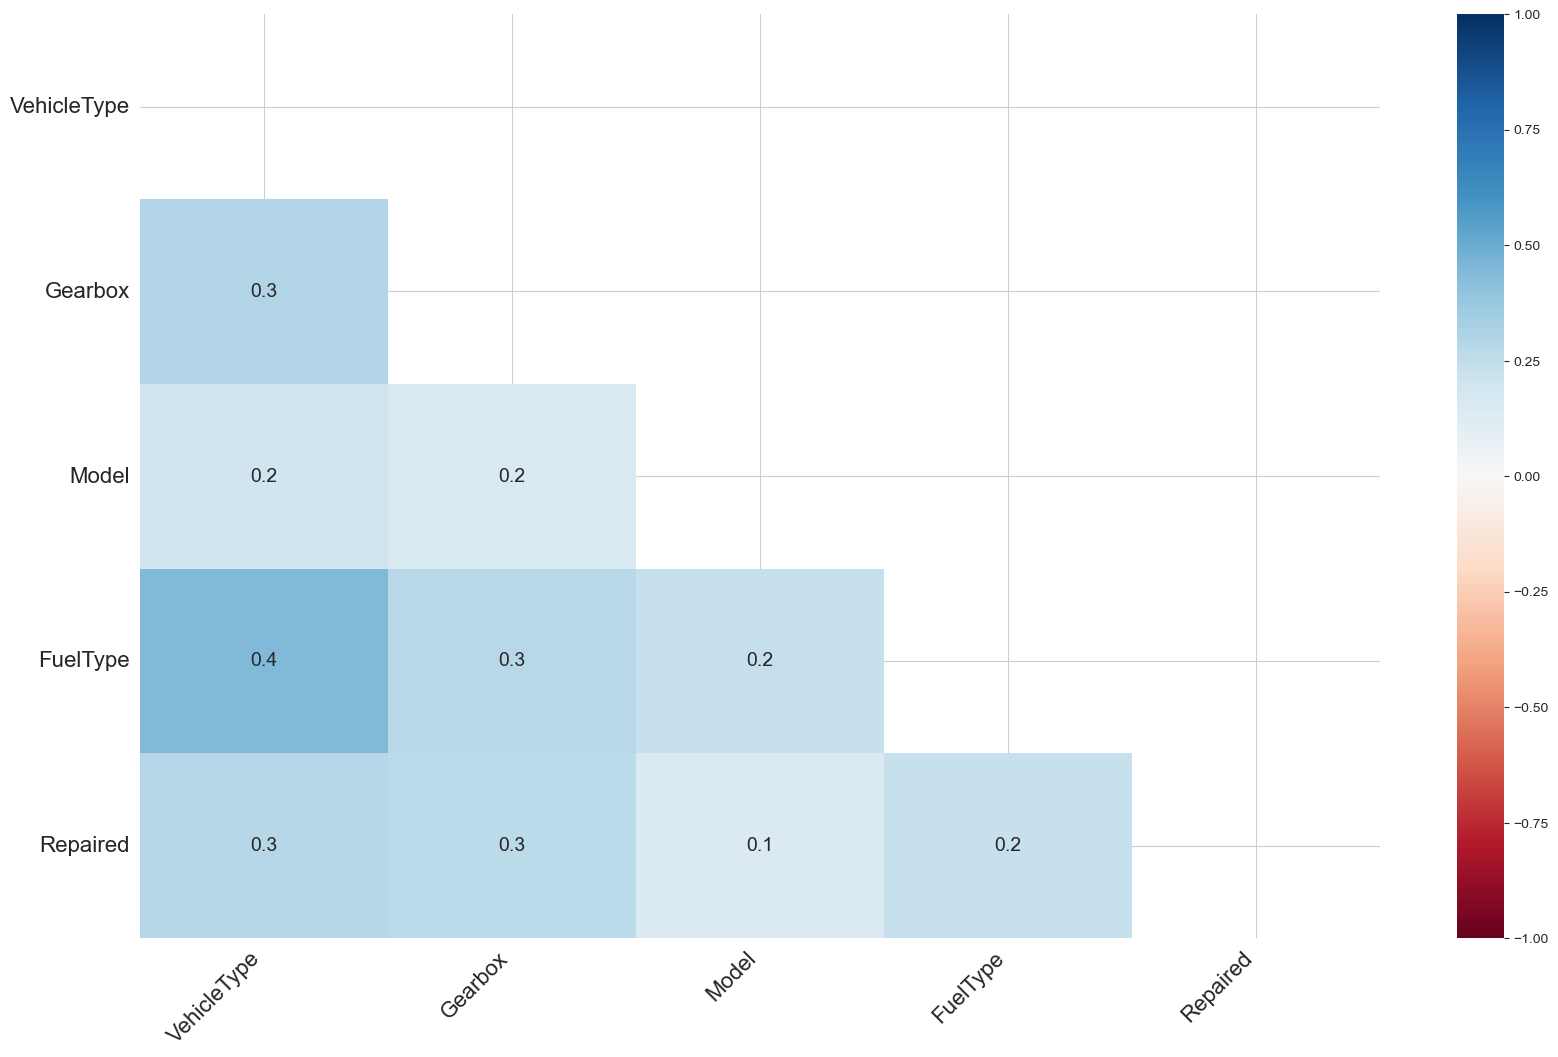

In [69]:
msno.heatmap( data_all);

Корреляция пропусков близка к нулю для всех признаков. Другими словами, пропуски одного признака не влияют на пропуски другого. Удалять пропущенные значения считаю нецелесообразно, для того, чтобы не потерять информацию заполним пропуски "заглушками"

###### * Repaired	
предположим, что столбец не заполнялся, когда машина не ремонтировалась. Пропуск заполним 'no', как наиболее частым значением

In [70]:
data_all["Repaired"] = data_all["Repaired"].fillna("no")

###### * VehicleType
 Пропуск заполним 'no_value'

In [71]:
data_all["VehicleType"] = data_all["VehicleType"].fillna("no_value")

###### * FuelType
 Пропуск заполним 'no_value'

In [72]:
data_all["FuelType"] = data_all["FuelType"].fillna("no_value")

###### * Gearbox
 Пропуск заполним 'no_value'

In [73]:
data_all["Gearbox"] = data_all["Gearbox"].fillna("no_value")

###### * Model
 Пропуск заполним 'no_value'

In [74]:
data_all["Model"] = data_all["Model"].fillna("no_value")

In [75]:
all_data_na = (data_all.isnull().sum() / len(data_all)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


Необходимо провести работу с дубликатами. Посмотрим сколько дубликатов

In [76]:
print("==>Количество  дубликатов<==\n")
print(f"исходный датасет: {data_all.duplicated().sum()}")
print(f"всего дубликатов: {data_all.duplicated().sum()/ len(data_all) * 100}%")

==>Количество  дубликатов<==

исходный датасет: 53452
всего дубликатов: 15.083712175726433%


Выявлено большое количество дубликатов. Дубликаты в записях однозначно стоит удалить

In [77]:
data_all_ = data_all.drop_duplicates()   

Проведем работу с аномалиями. в первую очередь удалим аномалии в столбце год регистрации автомобиля, т.к. согласно нашим графикам какое-либо значимое количество зарегистрированных автомобилей мы видим начиная с 1956г. и также автомобили с регистрацией позже даты выгрузки (2016) необходимо удалить, как ошибочные данные

In [78]:
# делаем срез по дате регистрации автомобилей
data_all_ =  data_all_.loc[lambda x: (x['RegistrationYear'] >= 1956) & (x['RegistrationYear'] <= 2018)] 

Удалим аномалии в столбце Price и столбце Power

In [79]:
data_all_ =  data_all_.loc[lambda x: (x['Power'] > 10) & (x['Power'] <= 500)] 

In [80]:
data_all_ =  data_all_.loc[lambda x: (x['Price'] > 10)] 

##### Выводы:

1. Подготовили данные для дальнейшей работы:размер датафрейма был оптимизирован с помощью функции, были удалены неявные дубликаты, проанализированы данные с пропусками. 
2. С помощью  библиотеки missingno произвели анализ пропущенных значений. Выяснили, что Корреляция пропусков близка к нулю для всех признаков. Другими словами, пропуски одного признака не влияют на пропуски другого. Удалять пропущенные значения считаю нецелесообразно, для того, чтобы не потерять информацию заполнили пропуски "заглушками". 
3. Провели исследовательский анализ признаков с помощью гистограмм, барплотов, графиков рассеяния. 
4. Также провели корреляционный анализ признаков. Признаки с низкой корреляцией, неинформативные признаки и признаки, имеющие высокую корреляцию по отношению к целевому признаку удалили. Всего было удалено 6 признаков. Удалены аномалии.  
5. Пропуски в 5 столбцах заполнили "заглушками". 
6. Также проанализировали распределение целевого признака  с помощью stats.probplot. Было выявлен, что целевой признак имеет правый хвос, распределение его не нормально. Применив функцию np.log1p() к столбцу 'Price' в DataFrame data_all_total удалось сделать распределение более симметричным и нормальным. Несимметричное распределение признака может отразиться на качестве работы модели. Для нормализации при построении моделей воспользуемся одним из методов: StandardScaler(), MinMaxScaler(), RobustScaler(). 
7. Далее произведем произведем подготовку данных для построения моделей. Поскольку будем использовать и линейные модели и бустинги подготовка будет осуществляться по-разному.

##### Подготовка моделей бустинга

In [81]:
data_all_.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
1,18300,coupe,2011,manual,190,no_value,125000,petrol,audi,yes
2,9800,suv,2004,auto,163,grand,125000,petrol,jeep,no
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,petrol,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes


* Мы взяли 9 основных параметров для предсказания цен на автомобили

* Из них - 6 категорий, которые обязательно нужно будет "закодировать" после разделения выборок.

In [82]:
data_all_.columns

Index(['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model',
       'Kilometer', 'FuelType', 'Brand', 'Repaired'],
      dtype='object')

Определим категориальные и числовые признаки.

In [83]:
# Определение категориальных столбцов
categorical_cols = data_all_.select_dtypes(include='object').columns
categorical_cols

Index(['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired'], dtype='object')

In [84]:
num_cols =  ['RegistrationYear','Power', 'Kilometer']
num_cols

['RegistrationYear', 'Power', 'Kilometer']

In [85]:
RANDOM_STATE= 42

In [86]:
data = data_all_

In [87]:
data[['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']] = data[['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']].astype('object')

In [88]:
features = data.drop(['Price'], axis=1)
target = data['Price']

    # Разделение целевой и нецелевой выборки 
    # на обучающие и тестовые выборки
features_train,  features_test, target_train, target_test = train_test_split(
        features, 
        target, 
        test_size=.25, 
        random_state=RANDOM_STATE
    )

In [89]:
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((193992, 9), (64665, 9), (193992,), (64665,))

Произведем предварительную подготовку признаков, исходя из требований наших моделей. Для категориальных признаков будем использовать OneHotEncoder и OrdinalEncoder(), для числовых признаков StandardScaler().

In [90]:

num_columns = ['RegistrationYear','Power', 'Kilometer']

Приступим к построению пайпланов

In [91]:

ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, categorical_cols),
        ('num', MinMaxScaler(), num_columns)
    ],
    
    remainder='passthrough'
)
X_processed = data_preprocessor.fit_transform(features_train)
X_new_processed = data_preprocessor.transform(features_test)

In [92]:
oe_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('oe', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)
data_preprocessor_ = ColumnTransformer(
    [
        ('oe', oe_pipe, categorical_cols),
        ('num', 'passthrough', num_cols)
    ]
)

## Обучение моделей (базовые модели)

#### Модели бустинга

* CatBoostRegressor

In [93]:
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']
regressor_cb_baz = CatBoostRegressor(cat_features=cat_features)
hyperparams_cb_baz = [{'learning_rate': [0.1, 0.5, 0.7],
                'n_estimators': [100, 300, 500],
                'depth': [5, 7, 10],
                'random_state': [42],
                'verbose': [False]}]

print("# Выбор гиперпараметров")
print()
CatBoost = HalvingGridSearchCV(estimator = regressor_cb_baz, param_grid = hyperparams_cb_baz, aggressive_elimination=True, min_resources='exhaust', n_jobs=-1, scoring='neg_root_mean_squared_error', cv = 4)
CatBoost.fit(features_train, target_train, verbose=False)
print("Лучшие гиперпараметры:")
print()
print(CatBoost.best_params_)
print(-CatBoost.best_score_)
print()
print("Grid scores on development set:")
print()
means = CatBoost.cv_results_['mean_test_score']
stds = CatBoost.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, CatBoost.cv_results_['params']):
    print("%0.6f for %r" % ((mean * -1), params))
print()

cv_RMSE_CBR_ordinal = (max(means) * -1)

# Выбор гиперпараметров

Лучшие гиперпараметры:

{'depth': 10, 'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42, 'verbose': False}
1666.9460608672377

Grid scores on development set:

1939.161877 for {'depth': 5, 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 42, 'verbose': False}
1866.744298 for {'depth': 5, 'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 42, 'verbose': False}
1857.016635 for {'depth': 5, 'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42, 'verbose': False}
1928.699988 for {'depth': 5, 'learning_rate': 0.5, 'n_estimators': 100, 'random_state': 42, 'verbose': False}
1919.483307 for {'depth': 5, 'learning_rate': 0.5, 'n_estimators': 300, 'random_state': 42, 'verbose': False}
1937.481748 for {'depth': 5, 'learning_rate': 0.5, 'n_estimators': 500, 'random_state': 42, 'verbose': False}
1962.123241 for {'depth': 5, 'learning_rate': 0.7, 'n_estimators': 100, 'random_state': 42, 'verbose': False}
1985.358830 for {'depth': 5, 'lea

* LGBMRegressor

In [94]:
# Assuming you have features_train and target_train defined

# Convert specific columns to categorical data type
columns_to_convert = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']
features_train[columns_to_convert] = features_train[columns_to_convert].astype('category')

# Define the LightGBM regressor and hyperparameters grid
regressor_LGB = LGBMRegressor(random_state=1125, verbosity=-1)
hyperparams_LGB = {
    'max_depth': range(5, 10),
    'learning_rate': [0.1, 0.5, 0.7],
    'n_estimators': [100, 300],
    'min_data_in_bin': [1],
    'min_data_in_leaf': [1]
}

# Perform hyperparameter tuning using HalvingGridSearchCV
print("# Hyperparameter tuning")
LGB = HalvingGridSearchCV(estimator=regressor_LGB, param_grid=hyperparams_LGB, aggressive_elimination=True, 
                          scoring='neg_root_mean_squared_error', error_score='raise', cv=4, n_jobs=20)
LGB.fit(features_train, target_train)

# Display results
print("Best hyperparameters:")
print(-LGB.best_score_)
print(LGB.best_params_)

print("Grid scores on development set:")
means = -LGB.cv_results_['mean_test_score']
stds = LGB.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, LGB.cv_results_['params']):
    print("%0.6f for %r" % (mean, params))

cv_RMSE_LGB = max(means)

# Hyperparameter tuning
Best hyperparameters:
1672.216726688825
{'learning_rate': 0.1, 'max_depth': 9, 'min_data_in_bin': 1, 'min_data_in_leaf': 1, 'n_estimators': 300}
Grid scores on development set:
1907.369859 for {'learning_rate': 0.1, 'max_depth': 5, 'min_data_in_bin': 1, 'min_data_in_leaf': 1, 'n_estimators': 100}
1912.893294 for {'learning_rate': 0.1, 'max_depth': 5, 'min_data_in_bin': 1, 'min_data_in_leaf': 1, 'n_estimators': 300}
1915.415361 for {'learning_rate': 0.1, 'max_depth': 6, 'min_data_in_bin': 1, 'min_data_in_leaf': 1, 'n_estimators': 100}
1937.537774 for {'learning_rate': 0.1, 'max_depth': 6, 'min_data_in_bin': 1, 'min_data_in_leaf': 1, 'n_estimators': 300}
1916.127130 for {'learning_rate': 0.1, 'max_depth': 7, 'min_data_in_bin': 1, 'min_data_in_leaf': 1, 'n_estimators': 100}
1929.302298 for {'learning_rate': 0.1, 'max_depth': 7, 'min_data_in_bin': 1, 'min_data_in_leaf': 1, 'n_estimators': 300}
1905.504742 for {'learning_rate': 0.1, 'max_depth': 8, 'min_data_in_bin':

#### RandomForestRegressor регрессия

* RandomForestRegressor

In [95]:

X_processed_ = data_preprocessor_.fit_transform(features_train)

regressor_rf_baz = RandomForestRegressor()
max_depth_list = [x for x in range(10, 20)]
hyperparams_rf_baz = [{'max_depth': max_depth_list,
                'random_state': [1135],
                'n_estimators': [20, 30, 100]
    }]

print('# Выбор гиперпараметров')
print()
RandomForest = HalvingGridSearchCV(estimator = regressor_rf_baz, param_grid = hyperparams_rf_baz, aggressive_elimination=True, min_resources='exhaust', n_jobs=-1, scoring='neg_root_mean_squared_error', cv = 4)
RandomForest.fit(X_processed_, target_train)

print("Лучшие гиперпараметры:")
print(-RandomForest.best_score_)
print()
print(RandomForest.best_params_)
print()
print("Grid scores on development set:")
print()
means = RandomForest.cv_results_['mean_test_score']
stds = RandomForest.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, RandomForest.cv_results_['params']):
    print("%0.6f for %r" % ((mean * -1), params))
print()

cv_RMSE_ = (max(means) * -1)

# Выбор гиперпараметров

Лучшие гиперпараметры:
1739.2839210968555

{'max_depth': 16, 'n_estimators': 100, 'random_state': 1135}

Grid scores on development set:

2151.674261 for {'max_depth': 10, 'n_estimators': 20, 'random_state': 1135}
2145.132717 for {'max_depth': 10, 'n_estimators': 30, 'random_state': 1135}
2138.398317 for {'max_depth': 10, 'n_estimators': 100, 'random_state': 1135}
2135.725414 for {'max_depth': 11, 'n_estimators': 20, 'random_state': 1135}
2130.561819 for {'max_depth': 11, 'n_estimators': 30, 'random_state': 1135}
2127.394296 for {'max_depth': 11, 'n_estimators': 100, 'random_state': 1135}
2138.849619 for {'max_depth': 12, 'n_estimators': 20, 'random_state': 1135}
2127.877587 for {'max_depth': 12, 'n_estimators': 30, 'random_state': 1135}
2123.495035 for {'max_depth': 12, 'n_estimators': 100, 'random_state': 1135}
2144.670295 for {'max_depth': 13, 'n_estimators': 20, 'random_state': 1135}
2131.503529 for {'max_depth': 13, 'n_estimators': 30, 'random_state': 1135

Было подготовлено две модели бустинга: CatBoostRegressor,  LGBMRegressor. Для этих моделей   кодировка признаков не проводилась. Для моделей  DecisionTreeRegressor произвели предварительную подготовку категориальных признаков с помощью OrdinalEncoder(), 

#### Линейная модель

Подготовим признаки для линейной модели через пайплан. Для категориальных признаков будем использовать OneHotEncoder и OrdinalEncoder(), для числовых признаков StandardScaler()

In [96]:
X_processed = data_preprocessor.fit_transform(features_train)

elastic_net = ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3)
elastic_net.fit(X_processed, target_train)

regressor_e_ = ElasticNet()
hyperparams_e_ = [{'alpha': [0.0005, 1],
                'l1_ratio': [0.9, 1],
                'random_state': [3]}]


print('# Выбор гиперпараметров')
print()
elastic_net = HalvingGridSearchCV(estimator = regressor_e_, param_grid = hyperparams_e_, aggressive_elimination=True, min_resources='exhaust', n_jobs=-1, scoring='neg_root_mean_squared_error', cv = 4)
elastic_net.fit(X_processed, target_train)

print("Лучшие гиперпараметры:")
print(-elastic_net.best_score_)
print()
print(elastic_net.best_params_)
print()
print("Grid scores on development set:")
print()
means = elastic_net.cv_results_['mean_test_score']
stds = elastic_net.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, elastic_net.cv_results_['params']):
    print("%0.6f for %r" % ((mean * -1) , params))
print()


# Выбор гиперпараметров

Лучшие гиперпараметры:
2774.905321338611

{'alpha': 0.0005, 'l1_ratio': 1, 'random_state': 3}

Grid scores on development set:

2760.281575 for {'alpha': 0.0005, 'l1_ratio': 0.9, 'random_state': 3}
2760.230472 for {'alpha': 0.0005, 'l1_ratio': 1, 'random_state': 3}
3820.497861 for {'alpha': 1, 'l1_ratio': 0.9, 'random_state': 3}
2792.162503 for {'alpha': 1, 'l1_ratio': 1, 'random_state': 3}
2775.985575 for {'alpha': 0.0005, 'l1_ratio': 0.9, 'random_state': 3}
2774.905321 for {'alpha': 0.0005, 'l1_ratio': 1, 'random_state': 3}



## Анализ моделей

Лучшая модель на этапе кроссвалидации CatBoostRegressor с гиперпараметрами: {'depth': 10, 'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42, 'verbose': False}
метрика модели: 1665.59, Однако по времени гораздо быстрее отработала модель LGBMRegressor, хотя ее метрика немного уступает. 1669

Поэтому именно модель LGBMRegressor будет использована для получения предсказаний на тестовой выборке.

* LGBMRegressor

In [97]:
features_test[columns_to_convert] = features_test[columns_to_convert].astype('category')
# Начало замера времени предсказания
start_time = time.time()
# Предсказания на тренировочных данных
train_predictions = LGB.predict(features_train)
# Конец замера времени предсказания
end_time = time.time()
# Вычисление RMSE на тренировочных данных
train_rmse = np.sqrt(mean_squared_error(target_train, train_predictions))
prediction_time = end_time - start_time
# Предсказания на тестовых данных
predictions = LGB.predict(features_test)

# Вычисление RMSE
rmse = np.sqrt(mean_squared_error(target_test, predictions))
print("Лучшие параметры модели LGB:",CatBoost.best_params_)
print("Лучшая cv- метрика  модели LGB:",-RandomForest.best_score_)
print("RMSE на тренировочной выборке модели LGB:", train_rmse)
print("Длительность времени предсказания на тренировочных данных модели LGB:", prediction_time, "секунд")
print("RMSE на тестовой выборке модели LGB:", rmse)

Лучшие параметры модели LGB: {'depth': 10, 'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42, 'verbose': False}
Лучшая cv- метрика  модели LGB: 1739.2839210968555
RMSE на тренировочной выборке модели LGB: 1539.6400861566365
Длительность времени предсказания на тренировочных данных модели LGB: 1.449582815170288 секунд
RMSE на тестовой выборке модели LGB: 1674.566525947746


In [98]:
# Выводим итоговые результаты
print("Результаты лучших моделей (валидация на тесте и оценка overfitting):\n")

def print_total_results(title, train_predictions, train_target, test_predictions, test_target):
    
    print(f"{title} | Обучающий датасет => RMSE:{mean_squared_error(train_predictions, train_target) **0.5: .2f}, ",
                      f"R2-score:{r2_score(train_predictions,  train_target) **0.5: .2f}",
      
                    f"| Тестовая выборка => R2-score:{mean_squared_error(test_predictions, test_target) **0.5: .2f}",
                      f"R2-score:{r2_score(test_predictions, test_target): .2f}",
     )

Результаты лучших моделей (валидация на тесте и оценка overfitting):



In [99]:
# Выводим итоговые результаты
print("Результаты лучших моделей (валидация на тесте и оценка overfitting):\n")

def print_total_results(title, train_predictions, train_target, test_predictions, test_target):
    
    print(f"{title} | Обучающий датасет => RMSE:{mean_squared_error(train_predictions, train_target) **0.5: .2f}, ",
                      f"R2-score:{r2_score(train_predictions, train_target) **0.5: .2f}",
      
                      f"| Тестовая выборка => RMSE:{mean_squared_error(test_predictions, test_target) **0.5: .2f}",
                      f"R2-score:{r2_score(test_predictions, test_target): .2f}"
         )  

print_total_results("LGB           ", train_predictions, target_train, 
                   predictions, target_test)

Результаты лучших моделей (валидация на тесте и оценка overfitting):

LGB            | Обучающий датасет => RMSE: 1539.64,  R2-score: 0.94 | Тестовая выборка => RMSE: 1674.57 R2-score: 0.85


##### Выводы:

1. Подготовили данные для дальнейшей работы:размер датафрейма был оптимизирован с помощью функции, были удалены явные и неявные дубликаты, проанализированы данные с пропусками. 
2. С помощью  библиотеки missingno произвели анализ пропущенных значений. Выяснили, что Корреляция пропусков близка к нулю для всех признаков. Другими словами, пропуски одного признака не влияют на пропуски другого. Удалять пропущенные значения считаю нецелесообразно, для того, чтобы не потерять информацию заполнили пропуски "заглушками". Также исключили аномалии.  
3. Провели исследовательский анализ признаков с помощью гистограмм, барплотов, графиков рассеяния. 
4. Также провели корреляционный анализ признаков. Признаки с низкой корреляцией, неинформативные признаки и признаки, имеющие высокую корреляцию по отношению к целевому признаку удалили. Всего было удалено 6 признаков.  
5. Пропуски в 5 столбцах заполнили "заглушками". 
6. Также проанализировали распределение целевого признака  с помощью stats.probplot. Было выявлен, что целевой признак имеет правый хвост, распределение его не нормально. Применив функцию np.log1p() к столбцу 'Price' в DataFrame data_all_total удалось сделать распределение более симметричным и нормальным. Несимметричное распределение признака может отразиться на качестве работы модели. Для нормализации при построении моделей воспользуемся одним из методов: StandardScaler(), MinMaxScaler(), RobustScaler(). 

Используемые модели:


* Elastic Net Regression :
 повышена устойчивость к выбросам, однако Elastic Net Regression показала худший результат: RMSE на тренировочной выборке модели elastic_net: 3089. Считаю, что на метрике сказалось несимметричное распределение целевого признака.;
* Gradient Boosting :
Модели, минимизирующие функцию потерь.
* Лучший результат показала модель CatBoostRegressor : RMSE на тренировочной выборке модели LGB: 1531.75
Длительность времени предсказания на тренировочных данных модели 3 мин.
RMSE на тестовой выборке модели CatBoostRegressor : 1673. Показатели метрики соответствуют условиям ТЗ.
* RandomForestRegressor показала лучший результат: RMSE на тренировочной выборке модели : 1296. Однако метрика на тестовой выборке  неожиданно низкий RMSE 1743. Даже базовая модель с минимальным количеством деревьев может давать достаточно высокий результат.
* Модель LGBMRegressor показала тоже неплохой результат, ее метрика незначительно уступает метрике модели CatBoostRegressor. Однако время обучения модели и время получения предсказания несопоставимо ниже времени всех остальных моделей. Именно это явилось основной причиной выбора этой модели для получения предказаний на тестовой выборке.
* Подходы к кодированию категорий всегда влияют на итоговый результат - для разных срезов данных и алгоритмов. Однако, для модели CatBoostRegressor предварительной кодировки категориальных признаков не требуется. Признаки можно передавать напрямую модели и получить при этом хорошую метрику. Даже в условиях работы тренажера ЯП можно выбрать необходимые гиперпараметры. Время обучения модели с бОльшим количеством деревьев значительно меньше аналогичного выбора на модели LGBMRegressor.